# Assignment - Network Intrusion Detection Case Study

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import kds

from scipy import stats
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import roc_auc_score,classification_report, confusion_matrix, accuracy_score, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import mutual_info_classif, f_classif, RFE, SelectKBest
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from itertools import repeat
from imblearn.over_sampling import SMOTE

%matplotlib inline
# %matplotlib notebook 

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)

import warnings
warnings.filterwarnings('ignore')

In [5]:
bbo = pd.read_csv('Datasets/Data_of_Attack_Back_BufferOverflow.csv')
nmap = pd.read_csv('Datasets/Data_of_Attack_Back_NMap.csv')
rootkit = pd.read_csv('Datasets/Data_of_Attack_Back_RootKit.csv')
satan = pd.read_csv('Datasets/Data_of_Attack_Back_Satan.csv')
psweep = pd.read_csv('Datasets/Data_of_Attack_Back_PortSweep.csv')
ftp_write = pd.read_csv('Datasets/Data_of_Attack_Back_FTPWrite.csv', names = list(bbo.columns))
guess_pw = pd.read_csv('Datasets/Data_of_Attack_Back_GuessPassword.csv')
normal = pd.read_csv('Datasets/Data_of_Attack_Back_Normal.csv')
back = pd.read_csv('Datasets/Data_of_Attack_Back.csv')
neptune = pd.read_csv('Datasets/Data_of_Attack_Back_Neptune.csv')
smurf = pd.read_csv('Datasets/Data_of_Attack_Back_Smurf.csv')

In [6]:
bbo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      30 non-null     float64
 1    protocol_type                30 non-null     int64  
 2    service                      30 non-null     float64
 3    flag                         30 non-null     float64
 4    src_bytes                    30 non-null     float64
 5    dst_bytes                    30 non-null     float64
 6    land                         30 non-null     int64  
 7    wrong_fragment               30 non-null     int64  
 8    urgent                       30 non-null     int64  
 9    hot                          30 non-null     float64
 10   num_failed_logins            30 non-null     int64  
 11   logged_in                    30 non-null     float64
 12   num_compromised              30 non-null     float64
 13   root_s

In [5]:
nmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      1554 non-null   int64  
 1    protocol_type                1554 non-null   float64
 2    service                      1554 non-null   float64
 3    flag                         1554 non-null   float64
 4    src_bytes                    1554 non-null   float64
 5    dst_bytes                    1554 non-null   float64
 6    land                         1554 non-null   int64  
 7    wrong_fragment               1554 non-null   int64  
 8    urgent                       1554 non-null   int64  
 9    hot                          1554 non-null   int64  
 10   num_failed_logins            1554 non-null   int64  
 11   logged_in                    1554 non-null   int64  
 12   num_compromised              1554 non-null   int64  
 13   ro

In [6]:
rootkit.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      10 non-null     float64
 1    protocol_type                10 non-null     float64
 2    service                      10 non-null     float64
 3    flag                         10 non-null     int64  
 4    src_bytes                    10 non-null     float64
 5    dst_bytes                    10 non-null     float64
 6    land                         10 non-null     int64  
 7    wrong_fragment               10 non-null     int64  
 8    urgent                       10 non-null     float64
 9    hot                          10 non-null     float64
 10   num_failed_logins            10 non-null     float64
 11   logged_in                    10 non-null     float64
 12   num_compromised              10 non-null     float64
 13   root_sh

In [7]:
satan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      5019 non-null   float64
 1    protocol_type                5019 non-null   float64
 2    service                      5019 non-null   float64
 3    flag                         5019 non-null   float64
 4    src_bytes                    5019 non-null   float64
 5    dst_bytes                    5019 non-null   float64
 6    land                         5019 non-null   int64  
 7    wrong_fragment               5019 non-null   int64  
 8    urgent                       5019 non-null   int64  
 9    hot                          5019 non-null   float64
 10   num_failed_logins            5019 non-null   float64
 11   logged_in                    5019 non-null   float64
 12   num_compromised              5019 non-null   float64
 13   ro

In [8]:
psweep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964 entries, 0 to 2963
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      2964 non-null   float64
 1    protocol_type                2964 non-null   float64
 2    service                      2964 non-null   float64
 3    flag                         2964 non-null   float64
 4    src_bytes                    2964 non-null   float64
 5    dst_bytes                    2964 non-null   float64
 6    land                         2964 non-null   int64  
 7    wrong_fragment               2964 non-null   int64  
 8    urgent                       2964 non-null   int64  
 9    hot                          2964 non-null   float64
 10   num_failed_logins            2964 non-null   int64  
 11   logged_in                    2964 non-null   float64
 12   num_compromised              2964 non-null   int64  
 13   ro

In [9]:
ftp_write.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      8 non-null      float64
 1    protocol_type                8 non-null      int64  
 2    service                      8 non-null      float64
 3    flag                         8 non-null      int64  
 4    src_bytes                    8 non-null      float64
 5    dst_bytes                    8 non-null      float64
 6    land                         8 non-null      int64  
 7    wrong_fragment               8 non-null      int64  
 8    urgent                       8 non-null      float64
 9    hot                          8 non-null      float64
 10   num_failed_logins            8 non-null      int64  
 11   logged_in                    8 non-null      float64
 12   num_compromised              8 non-null      float64
 13   root_she

In [10]:
guess_pw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      53 non-null     float64
 1    protocol_type                53 non-null     int64  
 2    service                      53 non-null     float64
 3    flag                         53 non-null     float64
 4    src_bytes                    53 non-null     float64
 5    dst_bytes                    53 non-null     float64
 6    land                         53 non-null     int64  
 7    wrong_fragment               53 non-null     int64  
 8    urgent                       53 non-null     int64  
 9    hot                          53 non-null     float64
 10   num_failed_logins            53 non-null     float64
 11   logged_in                    53 non-null     float64
 12   num_compromised              53 non-null     int64  
 13   root_s

In [11]:
normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576710 entries, 0 to 576709
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      576710 non-null  float64
 1    protocol_type                576710 non-null  float64
 2    service                      576710 non-null  float64
 3    flag                         576710 non-null  float64
 4    src_bytes                    576710 non-null  float64
 5    dst_bytes                    576710 non-null  float64
 6    land                         576710 non-null  int64  
 7    wrong_fragment               576710 non-null  int64  
 8    urgent                       576710 non-null  float64
 9    hot                          576710 non-null  float64
 10   num_failed_logins            576710 non-null  float64
 11   logged_in                    576710 non-null  float64
 12   num_compromised              576710 non-nul

In [12]:
back.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 968 entries, 0 to 967
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      968 non-null    float64
 1    protocol_type                968 non-null    int64  
 2    service                      968 non-null    int64  
 3    flag                         968 non-null    float64
 4    src_bytes                    968 non-null    float64
 5    dst_bytes                    968 non-null    float64
 6    land                         968 non-null    int64  
 7    wrong_fragment               968 non-null    int64  
 8    urgent                       968 non-null    int64  
 9    hot                          968 non-null    float64
 10   num_failed_logins            968 non-null    int64  
 11   logged_in                    968 non-null    float64
 12   num_compromised              968 non-null    float64
 13   root

In [13]:
neptune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227228 entries, 0 to 227227
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      227228 non-null  float64
 1    protocol_type                227228 non-null  int64  
 2    service                      227228 non-null  float64
 3    flag                         227228 non-null  float64
 4    src_bytes                    227228 non-null  float64
 5    dst_bytes                    227228 non-null  float64
 6    land                         227228 non-null  int64  
 7    wrong_fragment               227228 non-null  int64  
 8    urgent                       227228 non-null  int64  
 9    hot                          227228 non-null  int64  
 10   num_failed_logins            227228 non-null  int64  
 11   logged_in                    227228 non-null  float64
 12   num_compromised              227228 non-nul

In [14]:
smurf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3007 entries, 0 to 3006
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      3007 non-null   int64  
 1    protocol_type                3007 non-null   float64
 2    service                      3007 non-null   float64
 3    flag                         3007 non-null   int64  
 4    src_bytes                    3007 non-null   float64
 5    dst_bytes                    3007 non-null   int64  
 6    land                         3007 non-null   int64  
 7    wrong_fragment               3007 non-null   float64
 8    urgent                       3007 non-null   int64  
 9    hot                          3007 non-null   int64  
 10   num_failed_logins            3007 non-null   int64  
 11   logged_in                    3007 non-null   int64  
 12   num_compromised              3007 non-null   int64  
 13   ro

In [15]:
# add a column 'Attack_Type' and fill it with the type of attack

bbo['Attack_Type'] = pd.Series(list(repeat('bbo',bbo.shape[0])))
nmap['Attack_Type'] = pd.Series(list(repeat('nmap',nmap.shape[0])))
rootkit['Attack_Type'] = pd.Series(list(repeat('rootkit',rootkit.shape[0])))
satan['Attack_Type'] = pd.Series(list(repeat('satan',satan.shape[0])))
psweep['Attack_Type'] = pd.Series(list(repeat('psweep',psweep.shape[0])))
ftp_write['Attack_Type'] = pd.Series(list(repeat('ftp_write',ftp_write.shape[0])))
guess_pw['Attack_Type'] = pd.Series(list(repeat('guess_pw',guess_pw.shape[0])))
normal['Attack_Type'] = pd.Series(list(repeat('normal',normal.shape[0])))
back['Attack_Type'] = pd.Series(list(repeat('back',back.shape[0])))
neptune['Attack_Type'] = pd.Series(list(repeat('neptune',neptune.shape[0])))
smurf['Attack_Type'] = pd.Series(list(repeat('smurf',smurf.shape[0])))

normal.shape

(576710, 42)

## Merging the datasets

In [16]:
# append or concat all the dataframes. concat is a shorter way to append all the dataframes.
frames = [bbo,nmap,rootkit,satan,psweep,ftp_write,guess_pw,normal,back,neptune,smurf]
data = pd.concat(frames, ignore_index = 'True')
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack_Type
0,0.0184,0.0,0.05,0.0,0.01511,0.02957,0,0.0,0.0,0.3,0.0,0.1,0.2,0.1,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.003,0.1,0.0,0.10,0.067,0.0,0.0,0.0,0.0,bbo
1,0.0305,0.0,0.05,0.0,0.01735,0.02766,0,0.0,0.0,0.3,0.0,0.1,0.2,0.1,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.004,0.1,0.0,0.05,0.050,0.0,0.0,0.0,0.0,bbo
2,0.0150,0.0,0.05,0.0,0.01587,0.06707,0,0.0,0.0,0.1,0.0,0.1,0.3,0.0,0.0,0.1,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,bbo
3,0.0060,0.0,0.05,0.0,0.02328,0.04551,0,0.0,0.0,0.3,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,bbo
4,0.0158,0.0,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,0.0,0.1,0.4,0.1,0.0,0.0,0.1,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.05,0.000,0.0,0.0,0.0,0.0,bbo
5,0.0113,0.0,0.05,0.0,0.06274,0.16771,0,0.0,0.0,0.5,0.0,0.1,0.2,0.1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,bbo
6,0.0053,0.0,0.05,0.0,0.02628,0.03860,0,0.0,0.0,0.3,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.05,0.000,0.0,0.0,0.0,0.0,bbo
7,0.0000,0.0,0.14,0.0,0.00000,0.05690,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,bbo
8,0.0000,0.0,0.14,0.0,0.00000,0.05828,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.002,0.002,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,bbo
9,0.0000,0.0,0.14,0.0,0.00000,0.05020,0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.003,0.003,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.003,0.003,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,bbo


In [17]:
# creating target variable for bi-class classification
data['BiNom_Attack'] = np.where(data.Attack_Type == 'normal','normal','attack')
data.BiNom_Attack.value_counts()

normal    576710
attack    240841
Name: BiNom_Attack, dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Data columns (total 43 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   duration                      817551 non-null  float64
 1    protocol_type                817551 non-null  float64
 2    service                      817551 non-null  float64
 3    flag                         817551 non-null  float64
 4    src_bytes                    817551 non-null  float64
 5    dst_bytes                    817551 non-null  float64
 6    land                         817551 non-null  int64  
 7    wrong_fragment               817551 non-null  float64
 8    urgent                       817551 non-null  float64
 9    hot                          817551 non-null  float64
 10   num_failed_logins            817551 non-null  float64
 11   logged_in                    817551 non-null  float64
 12   num_compromised              817551 non-nul

In [19]:
# data.to_excel('data.xlsx')
data.shape

(817551, 43)

### Data Dictionary

**Nominal**: Protocol_type(2),Service(3),Flag(4)

**Binary**: Land(7), logged_in(12), root_shell(14), su_attempted(15), is_host_login(21), is_guest_login(22)

**Numeric**: Duration(1), src_bytes(5), dst_bytes(6), wrong_fragment(8), urgent(9), hot(10), num_failed_logins(11), num_compromised(13), num_root(16), num_file_creations(17), num_shells(18), num_access_files(19), num_outbound_cmds(20), count(23), srv_count(24), error_rate(25), srv_serror_rate(26), rerror_rate(27),srv_rerror_rate(28), same_srv_rate(29), diff_srv_rate(30), srv_diff_host_rate(31), dst_host_count(32), dst_host_srv_count(33), dst_host_same_srv_rate(34), dst_host_diff_srv_rate(35), dst_host_same_src_port_rate(36), dst_host_srv_diff_host_rate(37), dst_host_serror_rate(38), dst_host_srv_serror_rate(39), dst_host_rerror_rate(40), dst_host_srv_rerror_rate(41)

In [20]:
# all the columns names have white space. Following is the code to remove white spaces and renaming the columns of the dataframe

# cols = []
# for column in data.columns:
#     column = column.strip()
#     cols.append(column)

cols = [col.strip() for col in data.columns]
data.columns = cols
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_error_rate',
       'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'Attack_Type',
       'BiNom_Attack'],
      dtype='object')

In [21]:
# changing columns with correct columns names for all individual datasets

bbo.columns = cols[:-1]
nmap.columns = cols[:-1]
rootkit.columns = cols[:-1]
satan.columns = cols[:-1]
psweep.columns = cols[:-1]
ftp_write.columns = cols[:-1]
guess_pw.columns = cols[:-1]
normal.columns = cols[:-1]
back.columns = cols[:-1]
neptune.columns = cols[:-1]
smurf.columns = cols[:-1]

In [22]:
# converting nominal columns to category datatype
data[['protocol_type','service','flag']] = data[['protocol_type','service','flag']].astype('category')

In [23]:
# dividing the data into two parts - training and validation
train, val = np.split(data.sample(frac = 1, random_state = 42), [int(.9*len(data))])
print(train.shape, val.shape)

(735795, 43) (81756, 43)


In [24]:
# finding the percentage of zero's in the binary variables

for col in ['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']:
    print(round((train[[col]].value_counts() / train[[col]].shape[0]) * 100,4),'\n')

land
0       100.0
dtype: float64 

logged_in
0.1          63.799
0.0          36.201
dtype: float64 

root_shell
0.0           99.9705
0.1            0.0295
dtype: float64 

su_attempted
0.0             99.9937
0.2              0.0041
0.1              0.0022
dtype: float64 

is_host_login
0.0              99.9999
0.1               0.0001
dtype: float64 

is_guest_login
0.0               99.7247
0.1                0.2753
dtype: float64 



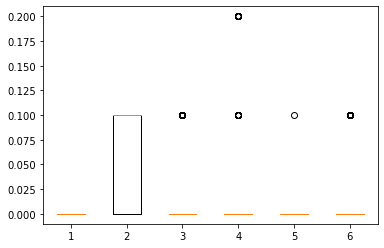

In [25]:
plt.boxplot(train[['land','logged_in','root_shell','su_attempted','is_host_login','is_guest_login']]
plt.show()

### su_attempted is not Binary. Further based on the number of unique values present in these columns we can drop land, root_shell, su_attempted, is_host_login and is_guest_login as there is no variation in the data. Data with zero variation does not contribute towards the model. 

However, there could have been one way to solve the missing values / zero variance problems in this kind of situation - we could have taken the columns with zero variance as our y one at a time and balance columns without zero variance as X and then applied linear regression to get the values. Repeat this step for each column with zero values/ zero variance. - **To be Explored**

In [26]:
train.drop(['land','root_shell','su_attempted','is_host_login','is_guest_login'], axis = 1, inplace = True)
train['logged_in'] = train['logged_in'].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735795 entries, 529029 to 468853
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     735795 non-null  float64 
 1   protocol_type                735795 non-null  category
 2   service                      735795 non-null  category
 3   flag                         735795 non-null  category
 4   src_bytes                    735795 non-null  float64 
 5   dst_bytes                    735795 non-null  float64 
 6   wrong_fragment               735795 non-null  float64 
 7   urgent                       735795 non-null  float64 
 8   hot                          735795 non-null  float64 
 9   num_failed_logins            735795 non-null  float64 
 10  logged_in                    735795 non-null  category
 11  num_compromised              735795 non-null  float64 
 12  num_root                     735795 non

# UDFs 

In [27]:
# Create Data audit Report for continuous variables

def eda(col):
    
    n = col.shape[0]
    nmiss = col.isna().sum()
    perc_miss = ( nmiss / n ) * 100
    
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    u_cutoff = q3 + (1.5 * iqr)
    l_cutoff = q1 - (1.5 * iqr)
    
    return pd.Series([n, nmiss, perc_miss, col.mean(), col.std(), col.var(), col.min(), l_cutoff, col.quantile(0.01), 
                      col.quantile(0.05),col.quantile(0.1), col.quantile(0.25), col.quantile(0.5), col.quantile(0.75),
                      col.quantile(0.95), col.quantile(0.99), col.max(), u_cutoff], 
                    index = ['Total', 'TotalMissing', 'PercMissing', 'Mean', 'Std', 'Var', 'Min', 'Lower_CutOff-IQR',
                             'P1', 'P5', 'P10','P25','P50','P75','P95','P99','Max','Upper_CutOff-IQR'])

In [28]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [29]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [30]:
# create user defined function to create the freq plots
def fn_countplot(pd_series):
    plt.figure(figsize = (10, 5))
    print('This is a freq chart for ' + pd_series.name)
    sns.countplot(y = pd_series)
    plt.show()
    return

# EDA

In [31]:
cont_var_summary = train.select_dtypes(['float64', 'int64']).apply(eda)
cont_var_summary.to_excel('cont_var_summary.xlsx')
cont_var_summary

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Total,735795.000000,735795.000000,735795.000000,7.357950e+05,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.0,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000
TotalMissing,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PercMissing,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,0.000881,0.004948,0.024871,4.077223e-07,0.000003,0.002440,0.000016,0.000271,0.001454,0.000287,0.000019,0.000361,0.0,0.059894,0.014078,0.024828,0.024925,0.005373,0.005331,0.073462,0.002938,0.010057,0.166870,0.161647,0.066798,0.003375,0.006141,0.001683,0.024859,0.024848,0.005386,0.005295
Std,0.026787,0.033106,0.066620,3.497380e-04,0.000841,0.041349,0.001649,0.010214,0.031673,0.011830,0.001404,0.006524,0.0,0.092008,0.031389,0.043071,0.043150,0.022366,0.022252,0.041812,0.010124,0.023545,0.102069,0.111648,0.043423,0.008537,0.017442,0.003715,0.043059,0.043149,0.021949,0.022103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P75,0.000000,0.002980,0.019700,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.106000,0.016000,0.014000,0.017000,0.000000,0.000000,0.100000,0.005000,0.008000,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.013000,0.003000,0.000000,0.000000
P95,0.000000,0.011530,0.117620,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.263000,0.036000,0.100000,0.100000,0.095000,0.100000,0.100000,0.007000,0.067000,0.255000,0.255000,0.100000,0.009000,0.035000,0.006000,0.100000,0.100000,0.077300,0.088000
P99,0.001500,0.070120,0.309771,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.296000,0.131000,0.100000,0.100000,0.100000,0.100000,0.100000,0.057000,0.100000,0.255000,0.255000,0.100000,0.039000,0.100000,0.018000,0.100000,0.100000,0.100000,0.100000
Max,1.000000,1.000000,1.000000,3.000000e-01,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,0.200000,0.900000,0.0,0.511000,0.511000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.255000,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


In [32]:
cat_var_summary = train.select_dtypes(['object', 'category']).apply(categorical_var_summary)
cat_var_summary

,protocol_type,service,flag,logged_in,Attack_Type,BiNom_Attack
N,735795.00,735795.00,735795.00,735795.0,735795,735795
NMISS,0.00,0.00,0.00,0.0,0,0
MODE,0.00,0.00,0.00,0.1,normal,normal
FREQ,698936.00,416148.00,513646.00,469430.0,519014,519014
PERCENT,94.99,56.56,69.81,63.8,70.54,70.54


This is a freq chart for Attack_Type


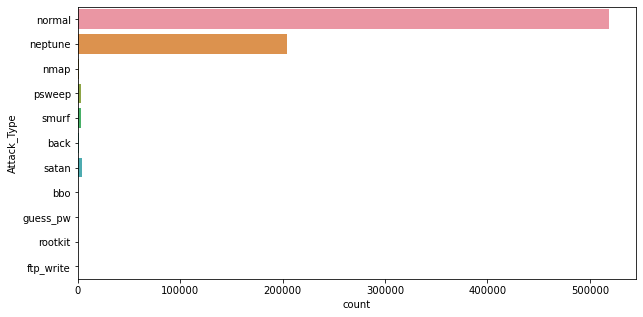

This is a freq chart for BiNom_Attack


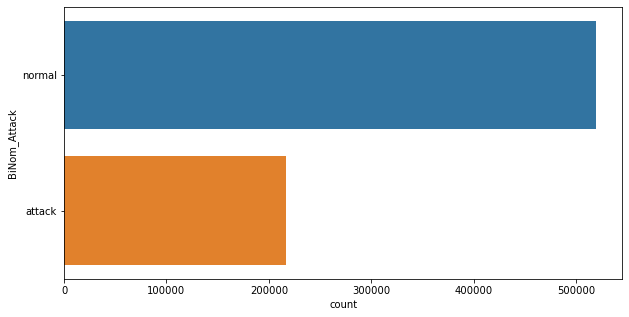

In [33]:
train.select_dtypes(['object']).apply( fn_countplot )
plt.show()

### Outlier Treatment

In [34]:
cont_data = train.select_dtypes(['float64', 'int64'])
cont_data = cont_data.apply(lambda x : x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [35]:
cont_data.apply(eda)

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Total,735795.000000,735795.000000,735795.000000,735795.0,735795.0,735795.0,735795.0,735795.0,735795.0,735795.0,735795.0,735795.0,735795.0,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000,735795.000000
TotalMissing,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PercMissing,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,0.000026,0.003330,0.022926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058881,0.012693,0.024828,0.024925,0.005373,0.005331,0.073470,0.002565,0.010057,0.166870,0.161647,0.066798,0.003005,0.006141,0.001582,0.024859,0.024848,0.005386,0.005295
Std,0.000172,0.008229,0.049738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.088242,0.017096,0.043071,0.043150,0.022366,0.022252,0.041796,0.006827,0.023545,0.102069,0.111648,0.043423,0.005271,0.017442,0.002783,0.043059,0.043149,0.021949,0.022103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P75,0.000000,0.002980,0.019700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106000,0.016000,0.014000,0.017000,0.000000,0.000000,0.100000,0.005000,0.008000,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.013000,0.003000,0.000000,0.000000
P95,0.000000,0.011530,0.117620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.263000,0.036000,0.100000,0.100000,0.095000,0.100000,0.100000,0.007000,0.067000,0.255000,0.255000,0.100000,0.009000,0.035000,0.006000,0.100000,0.100000,0.077300,0.088000
P99,0.001500,0.070120,0.309770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296000,0.131000,0.100000,0.100000,0.100000,0.100000,0.100000,0.057000,0.100000,0.255000,0.255000,0.100000,0.039000,0.100000,0.018000,0.100000,0.100000,0.100000,0.100000
Max,0.001500,0.070120,0.309771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.296000,0.131000,0.100000,0.100000,0.100000,0.100000,0.100000,0.057000,0.100000,0.255000,0.255000,0.100000,0.039000,0.100000,0.018000,0.100000,0.100000,0.100000,0.100000


### Variables with zero variance (all zero values / constant values) are to be dropped from the continuous data

In [36]:
for col in cont_data.columns:
    print("No of Non-zero values in {} are :- ".format(col),np.count_nonzero(cont_data[[col]]))

No of Non-zero values in duration are :-  31651
No of Non-zero values in src_bytes are :-  514545
No of Non-zero values in dst_bytes are :-  484292
No of Non-zero values in wrong_fragment are :-  0
No of Non-zero values in urgent are :-  0
No of Non-zero values in hot are :-  0
No of Non-zero values in num_failed_logins are :-  0
No of Non-zero values in num_compromised are :-  0
No of Non-zero values in num_root are :-  0
No of Non-zero values in num_file_creations are :-  0
No of Non-zero values in num_shells are :-  0
No of Non-zero values in num_access_files are :-  0
No of Non-zero values in num_outbound_cmds are :-  0
No of Non-zero values in count are :-  735795
No of Non-zero values in srv_count are :-  735795
No of Non-zero values in serror_rate are :-  188950
No of Non-zero values in srv_error_rate are :-  190302
No of Non-zero values in rerror_rate are :-  41868
No of Non-zero values in srv_rerror_rate are :-  43680
No of Non-zero values in same_srv_rate are :-  735795
No of

#### Based on the zero variance we can drop following columns:-

In [37]:
drop_col = []
for col in cont_data.columns:
    if np.count_nonzero(cont_data[[col]]) == 0:
        drop_col.append(col)

print(drop_col,'\n')
cont_data.drop(drop_col, axis = 1, inplace = True)
cont_data.info()

['wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds'] 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735795 entries, 529029 to 468853
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     735795 non-null  float64
 1   src_bytes                    735795 non-null  float64
 2   dst_bytes                    735795 non-null  float64
 3   count                        735795 non-null  float64
 4   srv_count                    735795 non-null  float64
 5   serror_rate                  735795 non-null  float64
 6   srv_error_rate               735795 non-null  float64
 7   rerror_rate                  735795 non-null  float64
 8   srv_rerror_rate              735795 non-null  float64
 9   same_srv_rate                735795 non-null  float64
 10  diff

### Categorical Variable Analysis

In [38]:
# splitting the categorical variable
cat_var = train.select_dtypes('category')
cat_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735795 entries, 529029 to 468853
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   protocol_type  735795 non-null  category
 1   service        735795 non-null  category
 2   flag           735795 non-null  category
 3   logged_in      735795 non-null  category
dtypes: category(4)
memory usage: 24.5 MB


In [39]:
for col in cat_var.columns:
    print(cat_var[[col]].value_counts(), '\n')

protocol_type
0.0              698936
0.01              31845
0.02               5014
dtype: int64 

service
0.0        416148
0.12       163545
0.01        48459
0.02        28638
0.14        19814
            ...  
0.38            5
0.65            2
0.67            2
0.63            1
0.64            1
Length: 67, dtype: int64 

flag
0.0     513646
0.07    182400
0.05     34810
0.06      2319
0.08      1819
         ...  
0.1        266
0.09       111
0.01        82
0.04        33
0.03        14
Length: 11, dtype: int64 

logged_in
0.1          469430
0.0          266365
dtype: int64 



#### As we can see above, service has 67 categories and flag has 11 and barring first 5 in service and first 3 in flag, all of them are infrequent which will not be of any significant contribution to the model. Therefore, we can use min_frequency and max_categories features of OneHotEncoder to avoid proliferation of dummy variables in the model. 

In [40]:
ohe = OneHotEncoder(min_frequency = 5000, drop = 'first', sparse_output = False)
encoded = ohe.fit(cat_var)

In [41]:
encoded_cat_data = pd.DataFrame(encoded.transform(cat_var), index = cat_var.index, columns = ohe.get_feature_names_out())
encoded_cat_data.head()

,protocol_type_0.01,protocol_type_0.02,service_0.01,service_0.02,service_0.12,service_0.14,service_infrequent_sklearn,flag_0.05,flag_0.07,flag_infrequent_sklearn,logged_in_0.1
529029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
632184,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
42537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
722040,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
42712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
print(ohe.infrequent_categories_, '\n', ohe.get_params())

[None, array([0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.13, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
       0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
       0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59,
       0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.67]), array([0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.09, 0.1 ]), None] 
 {'categories': 'auto', 'drop': 'first', 'dtype': <class 'numpy.float64'>, 'handle_unknown': 'error', 'max_categories': None, 'min_frequency': 5000, 'sparse': 'deprecated', 'sparse_output': False}


### Merging the continuous, categorical and target variables - for Binomial Classification

In [43]:
binom_data = pd.concat([cont_data, encoded_cat_data], axis = 1)
binom_data['Binom_Attack'] = np.where(train['BiNom_Attack'] == 'attack', 1, 0)
binom_data.shape

(735795, 34)

In [44]:
binom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735795 entries, 529029 to 468853
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     735795 non-null  float64
 1   src_bytes                    735795 non-null  float64
 2   dst_bytes                    735795 non-null  float64
 3   count                        735795 non-null  float64
 4   srv_count                    735795 non-null  float64
 5   serror_rate                  735795 non-null  float64
 6   srv_error_rate               735795 non-null  float64
 7   rerror_rate                  735795 non-null  float64
 8   srv_rerror_rate              735795 non-null  float64
 9   same_srv_rate                735795 non-null  float64
 10  diff_srv_rate                735795 non-null  float64
 11  srv_diff_host_rate           735795 non-null  float64
 12  dst_host_count               735795 non-null  float64

## Feature Selection

## Feature Selection by removing multi-collinearity in the data

In [45]:
# segregating X and y 
X_binom = binom_data.select_dtypes('float64')
y_binom = binom_data['Binom_Attack']
X_binom.head()

,duration,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_0.01,protocol_type_0.02,service_0.01,service_0.02,service_0.12,service_0.14,service_infrequent_sklearn,flag_0.05,flag_0.07,flag_infrequent_sklearn,logged_in_0.1
529029,0.0,0.00189,0.00686,0.006,0.006,0.0,0.000,0.0,0.0,0.100,0.000,0.000,0.045,0.255,0.100,0.000,0.002,0.004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
632184,0.0,0.00000,0.00000,0.146,0.006,0.1,0.100,0.0,0.0,0.004,0.006,0.000,0.255,0.006,0.002,0.005,0.000,0.000,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
42537,0.0,0.00259,0.11403,0.003,0.023,0.0,0.004,0.0,0.0,0.100,0.000,0.013,0.026,0.255,0.100,0.000,0.004,0.007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
722040,0.0,0.00000,0.00000,0.219,0.019,0.1,0.100,0.0,0.0,0.009,0.006,0.000,0.255,0.016,0.006,0.006,0.000,0.000,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
42712,0.0,0.00214,0.02262,0.004,0.004,0.0,0.000,0.0,0.0,0.100,0.000,0.000,0.036,0.255,0.100,0.000,0.003,0.003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


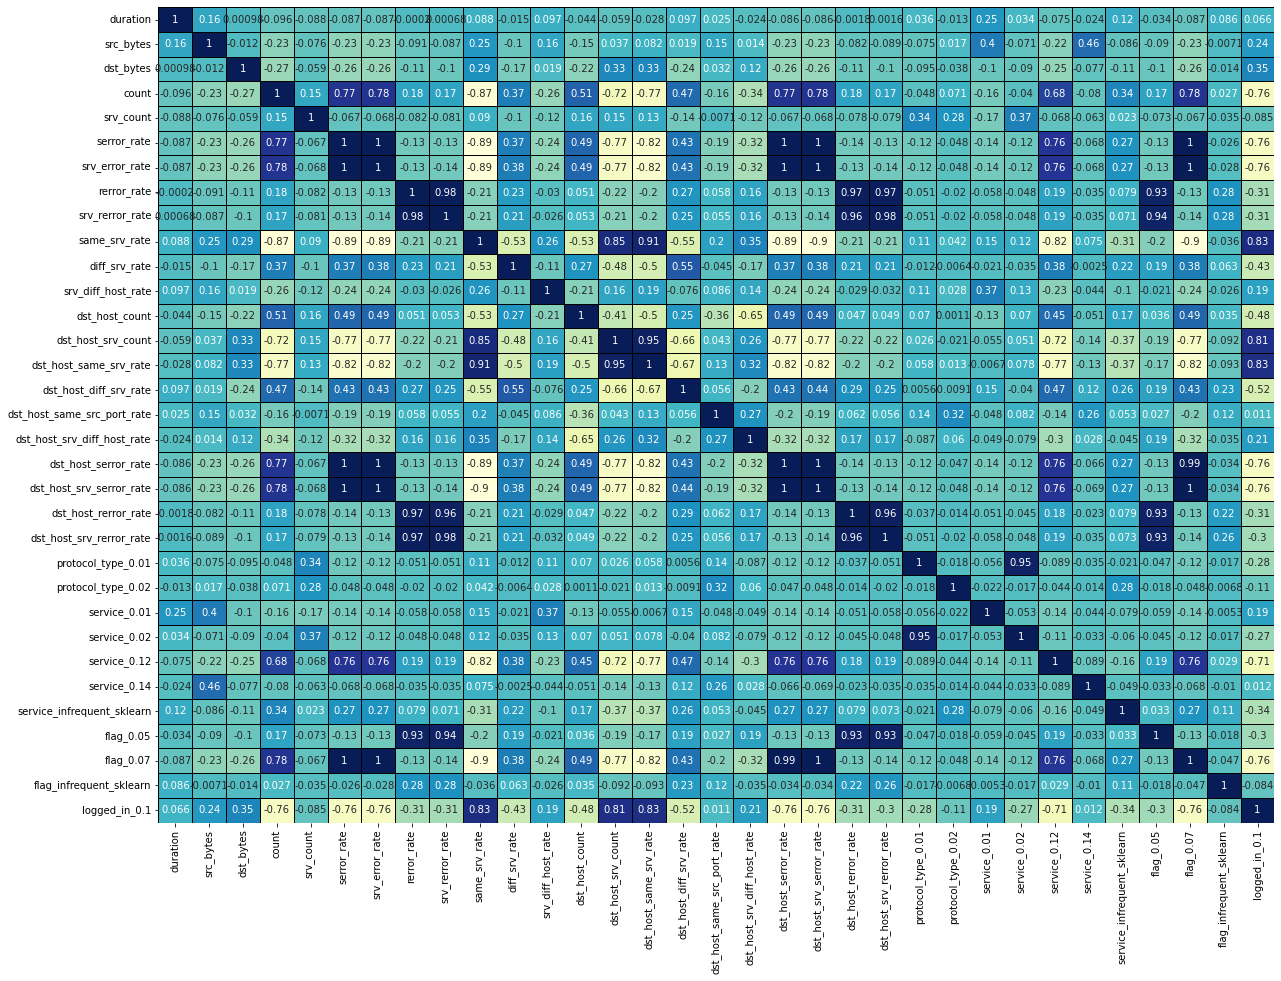

In [46]:
# saving and plotting the correlation matrix

X_binom.corr().to_excel('corr_mat.xlsx')
plt.figure(figsize = (20,15))
sns.heatmap(X_binom.corr(), annot = True, cbar = False, linewidths = 0.5, linecolor = 'black', cmap="YlGnBu")
plt.show()

In [47]:
vif = pd.DataFrame()
vif["variables"] = X_binom.columns
vif["VIF"] = [variance_inflation_factor(X_binom.values, i) for i in range(X_binom.shape[1])]
vif

,variables,VIF
0,duration,1.240235
1,src_bytes,2.037494
2,dst_bytes,1.456223
3,count,7.737820
4,srv_count,2.651916
...,...,...
28,service_infrequent_sklearn,6.604240
29,flag_0.05,78.223722
30,flag_0.07,598.337104
31,flag_infrequent_sklearn,9.909762


In [48]:
# writing a function for removal of variables with high VIF values. Typically any variable with VIF value more
# 10 should be excluded from the model

def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

features_calc_vif = list(calculate_vif(X_binom))
features_calc_vif

# X_VIF = X_binom.copy()

# vif = pd.DataFrame()
# vif["variables"] = X_VIF.columns
# vif["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]

# while vif.VIF.max() > 10:
#     if vif.VIF.max() > 10:
#         col = vif.loc[vif.VIF == vif.VIF.max()].variables.values[0]
#         X_VIF.drop(columns = col, axis = 1, inplace = True)
#     vif = pd.DataFrame()
#     vif["variables"] = X_VIF.columns
#     vif["VIF"] = [variance_inflation_factor(X_VIF.values, i) for i in range(X_VIF.shape[1])]

# features_vif = list(vif.variables)
# features_vif

dropping 'srv_error_rate' at index: 6
dropping 'serror_rate' at index: 5
dropping 'dst_host_srv_serror_rate' at index: 17
dropping 'flag_0.07' at index: 27
dropping 'same_srv_rate' at index: 7
dropping 'dst_host_same_srv_rate' at index: 11
dropping 'rerror_rate' at index: 5
dropping 'srv_rerror_rate' at index: 5
dropping 'dst_host_srv_rerror_rate' at index: 14
dropping 'logged_in_0.1' at index: 23
dropping 'dst_host_rerror_rate' at index: 13
dropping 'service_0.12' at index: 17
dropping 'protocol_type_0.01' at index: 13
dropping 'dst_host_count' at index: 7
dropping 'count' at index: 3
Remaining variables:
Index(['duration', 'src_bytes', 'dst_bytes', 'srv_count', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'protocol_type_0.02', 'service_0.01',
       'service_0.02', 'service_0.14', 'service_infrequent_sklearn',
       'flag_0.05', 'flag_i

['duration',
 'src_bytes',
 'dst_bytes',
 'srv_count',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'protocol_type_0.02',
 'service_0.01',
 'service_0.02',
 'service_0.14',
 'service_infrequent_sklearn',
 'flag_0.05',
 'flag_infrequent_sklearn']

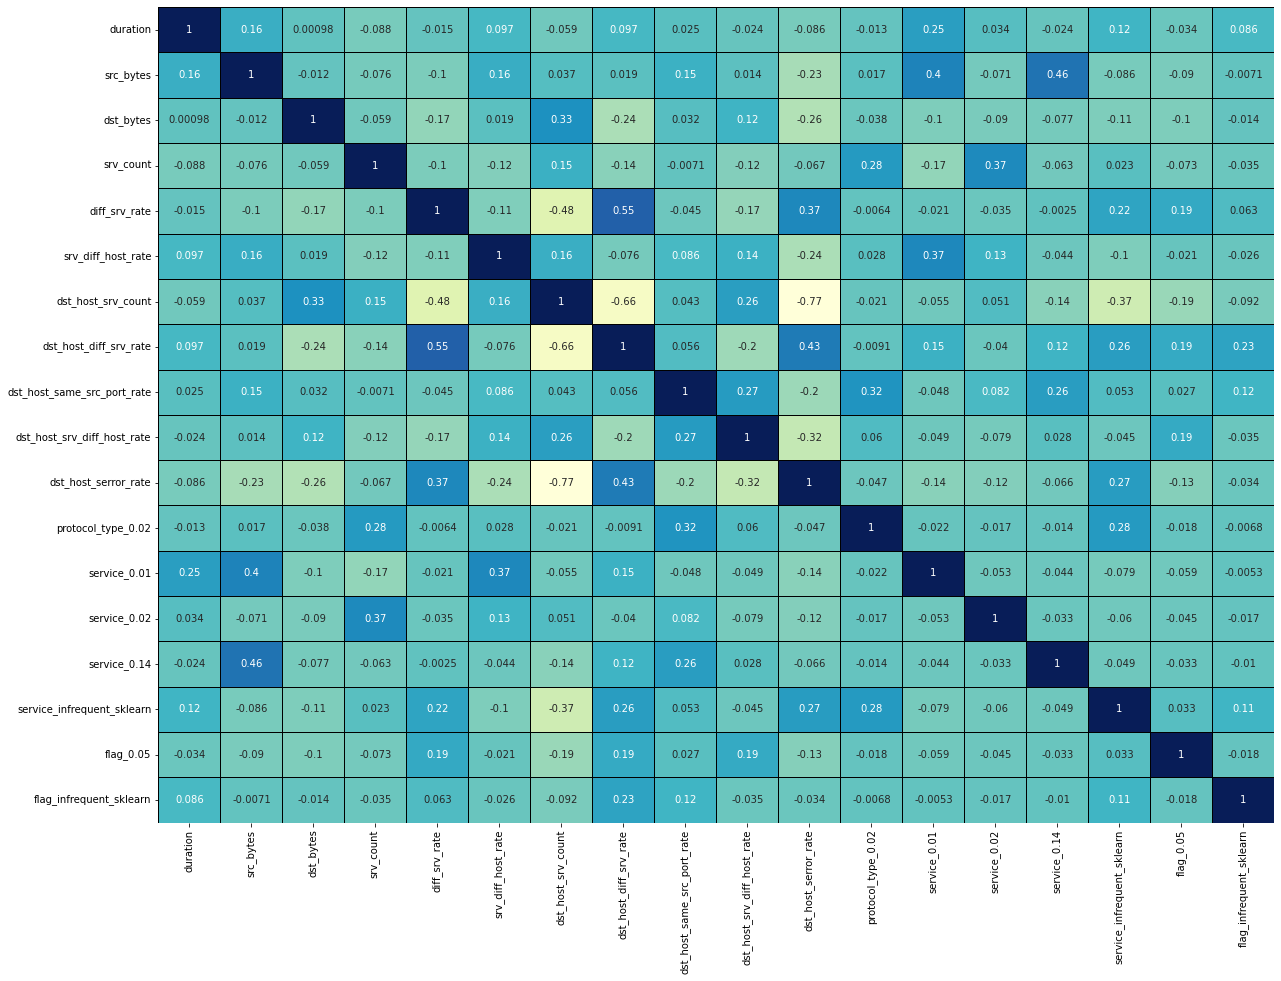

In [49]:
# plotting the correlation matrix after VIF treatment 
plt.figure(figsize = (20,15))
X_binom_vif = X_binom[features_calc_vif]
sns.heatmap(X_binom_vif.corr(), annot = True, cmap = "YlGnBu" , cbar = False, 
            linecolor = 'black', linewidths = 0.5)
plt.show()

### There is still some multi-collinearity present in the data

In [50]:
# checking the variables with high multi-collinearity from the correlation maxtrix of X_binom_vif

corrm = X_binom_vif.corr()
corr_x_x=corrm.unstack().sort_values().drop_duplicates().reset_index()
corr_x_x=corr_x_x.loc[(corr_x_x[0]>0.60) | (corr_x_x[0]<-0.60)]['level_0'].drop_duplicates()
corr_x_x

0      dst_host_srv_count
153              duration
Name: level_0, dtype: object

In [51]:
# dropping dst_host_srv_count and duration from X_binom_vif
X_binom_vif.drop(columns = ['dst_host_srv_count', 'duration'], axis = 1, inplace = True)
X_binom_vif.columns

Index(['src_bytes', 'dst_bytes', 'srv_count', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'protocol_type_0.02', 'service_0.01',
       'service_0.02', 'service_0.14', 'service_infrequent_sklearn',
       'flag_0.05', 'flag_infrequent_sklearn'],
      dtype='object')

### Feature Selection using feature selection techniques like SelectKBest and RFE in conjunction with f_classif() and mutual_info_classif() on the varibles selected after VIF technique

Double click this section for more info.

<!-- Since we have numerical predictors and categorical output, we can go for either f_classif() or mutual_info_classif() for the feature selection techniques

1. **mutual_info_classif()** estimates the mutual information for a discreet target variable. Mutual Information between two random variables is a non-negative value which measures the dependency between the variables. It is equal to zero iff two random variables are independent and higher values mean higher dependency. The function relies on non-parametric methods based on entropy estimation from k-Nearest neighbors. 

2. **mutual_info_regression()** is a method which is used when we have numerical predictor and numerical target variable. 

3. **f_classif()** is a linear ANOVA correlation coefficient. It is a feature selection technique to be used when we have numerical predictors and categorical target variables. mutual_info_classif() is agnostic to the data types. It is equally suitable for both numerical or categorical predictor and target variables. 

4. **r_regression**: Pearson's R between label/feature for regression tasks.

5. **f_classif**: ANOVA F-value between label/feature for classification tasks.

6. **f_regression**: F-value between label/feature for regression tasks.

7. **chi2**: Chi-squared stats of non-negative features for classification tasks.

8. **SelectKBest**: Select features based on the k highest scores.

9. **SelectFpr**: Select features based on a false positive rate test.

10. **SelectFdr**: Select features based on an estimated false discovery rate.

11. **SelectFwe**: Select features based on family-wise error rate.

12. **SelectPercentile**: Select features based on percentile of the highest -->

In [52]:
# Using mutual_info_classif technique to remove the un-important variables
importances = mutual_info_classif(X_binom_vif, y_binom)
feat_importances = pd.Series(importances, X_binom_vif.columns)
important_features = [features > 0.1 for features in feat_importances ]
sig_features_mic = feat_importances[important_features].index
sig_features_mic

Index(['src_bytes', 'dst_bytes', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate'],
      dtype='object')

In [53]:
# going with combination of selectKBest and mutual_info_classif methods to select 20 best predictors
skb_mic = SelectKBest(score_func = mutual_info_classif, k = 10)
skb_mic.fit_transform(X_binom_vif, y_binom)
skb_features_mic = skb_mic.get_feature_names_out()
skb_features_mic

array(['src_bytes', 'dst_bytes', 'srv_count', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'service_infrequent_sklearn'], dtype=object)

In [54]:
# going with selectKBest and f_classif methods to select 20 best predictors
skb_fc = SelectKBest(score_func = f_classif, k = 10)
skb_fc.fit_transform(X_binom_vif, y_binom)
skb_features_fc = skb_fc.get_feature_names_out()
skb_features_fc

array(['src_bytes', 'dst_bytes', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_diff_srv_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'service_0.01',
       'service_infrequent_sklearn', 'flag_0.05'], dtype=object)

In [55]:
# going with RFE and DecisionTreeClassifier methods for selection of 20 best predictors

# define feature selection
selector = RFE(estimator = DecisionTreeClassifier(), n_features_to_select = 10)

# apply feature selection
selector.fit_transform(X_binom_vif, y_binom)

# get feature names out

# print(selector.support_)
# print(selector.ranking_)
# rfe_features_1 = X_binom_vif.columns[selector.support_]
# rfe_features_1

rfe_features = selector.get_feature_names_out()
rfe_features

array(['src_bytes', 'dst_bytes', 'srv_count', 'diff_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'protocol_type_0.02', 'service_0.14',
       'flag_infrequent_sklearn'], dtype=object)

In [56]:
# merging the important columns obtained from skb_features_mic_lst + skb_features_fc_lst + rfe_features_lst
# we will merge using set to remove any duplicates

skb_features_mic_lst = list(skb_features_mic)
skb_features_fc_lst = list(skb_features_fc)
rfe_features_lst = list(rfe_features)
final_features = list(set(skb_features_mic_lst + skb_features_fc_lst + rfe_features_lst))
final_features

['dst_host_diff_srv_rate',
 'protocol_type_0.02',
 'service_infrequent_sklearn',
 'flag_0.05',
 'src_bytes',
 'dst_host_srv_diff_host_rate',
 'srv_diff_host_rate',
 'service_0.01',
 'dst_bytes',
 'service_0.14',
 'srv_count',
 'dst_host_serror_rate',
 'dst_host_same_src_port_rate',
 'diff_srv_rate',
 'flag_infrequent_sklearn']

In [57]:
X_binom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735795 entries, 529029 to 468853
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     735795 non-null  float64
 1   src_bytes                    735795 non-null  float64
 2   dst_bytes                    735795 non-null  float64
 3   count                        735795 non-null  float64
 4   srv_count                    735795 non-null  float64
 5   serror_rate                  735795 non-null  float64
 6   srv_error_rate               735795 non-null  float64
 7   rerror_rate                  735795 non-null  float64
 8   srv_rerror_rate              735795 non-null  float64
 9   same_srv_rate                735795 non-null  float64
 10  diff_srv_rate                735795 non-null  float64
 11  srv_diff_host_rate           735795 non-null  float64
 12  dst_host_count               735795 non-null  float64

In [58]:
X_binom_vif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735795 entries, 529029 to 468853
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   src_bytes                    735795 non-null  float64
 1   dst_bytes                    735795 non-null  float64
 2   srv_count                    735795 non-null  float64
 3   diff_srv_rate                735795 non-null  float64
 4   srv_diff_host_rate           735795 non-null  float64
 5   dst_host_diff_srv_rate       735795 non-null  float64
 6   dst_host_same_src_port_rate  735795 non-null  float64
 7   dst_host_srv_diff_host_rate  735795 non-null  float64
 8   dst_host_serror_rate         735795 non-null  float64
 9   protocol_type_0.02           735795 non-null  float64
 10  service_0.01                 735795 non-null  float64
 11  service_0.02                 735795 non-null  float64
 12  service_0.14                 735795 non-null  float64

In [59]:
X_binom_featSel = X_binom_vif[final_features]
print(X_binom_featSel.shape)
X_binom_featSel.info()

(735795, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 735795 entries, 529029 to 468853
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   dst_host_diff_srv_rate       735795 non-null  float64
 1   protocol_type_0.02           735795 non-null  float64
 2   service_infrequent_sklearn   735795 non-null  float64
 3   flag_0.05                    735795 non-null  float64
 4   src_bytes                    735795 non-null  float64
 5   dst_host_srv_diff_host_rate  735795 non-null  float64
 6   srv_diff_host_rate           735795 non-null  float64
 7   service_0.01                 735795 non-null  float64
 8   dst_bytes                    735795 non-null  float64
 9   service_0.14                 735795 non-null  float64
 10  srv_count                    735795 non-null  float64
 11  dst_host_serror_rate         735795 non-null  float64
 12  dst_host_same_src_port_rate  735795 non-

In [60]:
print(X_binom.shape,'\n',X_binom_vif.shape,'\n',X_binom_featSel.shape)

(735795, 33) 
 (735795, 16) 
 (735795, 15)


### Standardization of Data Using Standard Scaler

In [61]:
# create the StandardScaler object and fit and transform train and test data

cols = X_binom_featSel.columns
index = X_binom_featSel.index

sc = StandardScaler(random_state = 2023)
sc.fit(X_binom_featSel)

X_binom_sc = pd.DataFrame((sc.transform(X_binom_featSel)), index = index, columns = cols)
X_binom_sc.head()

,dst_host_diff_srv_rate,protocol_type_0.02,service_infrequent_sklearn,flag_0.05,src_bytes,dst_host_srv_diff_host_rate,srv_diff_host_rate,service_0.01,dst_bytes,service_0.14,srv_count,dst_host_serror_rate,dst_host_same_src_port_rate,diff_srv_rate,flag_infrequent_sklearn
529029,-0.570159,-0.082832,-0.295774,-0.222842,-0.174999,0.869120,-0.427148,-0.265523,-0.323023,-0.166355,-0.391505,-0.577333,-0.237393,-0.375733,-0.082206
632184,0.378420,-0.082832,-0.295774,-0.222842,-0.404662,-0.568419,-0.427148,-0.265523,-0.460947,-0.166355,-0.391505,1.745057,-0.352060,0.503146,-0.082206
42537,-0.570159,-0.082832,-0.295774,-0.222842,-0.089939,1.947275,0.124983,-0.265523,1.831686,-0.166355,0.602872,-0.577333,-0.122726,-0.375733,-0.082206
722040,0.568136,-0.082832,-0.295774,-0.222842,-0.404662,-0.568419,-0.427148,-0.265523,-0.460947,-0.166355,0.368901,1.745057,-0.352060,0.503146,-0.082206
42712,-0.570159,-0.082832,-0.295774,-0.222842,-0.144621,0.509735,-0.427148,-0.265523,-0.006160,-0.166355,-0.508491,-0.577333,-0.180060,-0.375733,-0.082206


### Splitting the dataset in train and test for binomial class classification

**When working with imbalanced data, use stratified sampling for your train/test split. In cases with balanced data, we can generate a train/test set simply by randomly assigning 30% of the data to a test set. However, in imbalanced data, this should be avoided. There is a big risk of ending up with almost no cases of the minority class in the test set. Stratified sampling is a solution to this. Stratified sampling will force the same class balance on the train and test dataset as the original data.**

In [62]:
# changing names of columns as per INC naming conventions

X_binom_sc.rename(columns = {'flag_0.05':'flag_0dt05','service_0.01':'service_0dt01', 
                                'service_0.14':'service_0dt14',
                               'protocol_type_0.02':'protocol_type_0dt02'
                               },inplace = True)

# split the data into X and y
X_train, X_test, y_train, y_test = train_test_split(X_binom_sc, y_binom, 
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y_binom)

# dealing with class imbalance using SMOTE

sm = SMOTE(random_state = 2023)
X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)
print(y_train.shape, y_train_smote.shape)

(515056,) (726618,)


# Logistic Regression 

In [63]:
log_model = LogisticRegression(random_state = 0, solver = 'newton-cholesky' ).fit(X_train_smote, y_train_smote)

print(f'Intercept : {log_model.intercept_}')
print('\nCoefficients:\n ')
for name, value in zip(X_train_smote.columns, log_model.coef_.ravel()):
    print(f'{name} : {value}')

Intercept : [-2.37381181]

Coefficients:
 
dst_host_diff_srv_rate : 0.8678572641296078
protocol_type_0dt02 : 0.5716418275898782
service_infrequent_sklearn : 0.09588995059870736
flag_0dt05 : 1.6674953284653806
src_bytes : 0.9567665447492284
dst_host_srv_diff_host_rate : -0.8387986309378196
srv_diff_host_rate : 0.12374231699328636
service_0dt01 : -1.5088873301206212
dst_bytes : -0.6961340046259512
service_0dt14 : -1.1081136097581732
srv_count : 0.49145788438385674
dst_host_serror_rate : 6.250239136514418
dst_host_same_src_port_rate : 0.5581711333695464
diff_srv_rate : 0.5326244408068166
flag_infrequent_sklearn : 0.6140976465785819


In [64]:
# train data classification report 

y_train_pred = log_model.predict(X_train_smote)
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    363309
           1       0.99      0.99      0.99    363309

    accuracy                           0.99    726618
   macro avg       0.99      0.99      0.99    726618
weighted avg       0.99      0.99      0.99    726618



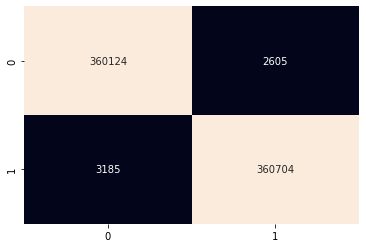

In [65]:
# train data confusion matrix

cm = confusion_matrix(y_train_pred, y_train_smote)
cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
plt.show()

Confusion matrix, without normalization
[[360124   3185]
 [  2605 360704]]
Normalized confusion matrix
[[0.99123336 0.00876664]
 [0.0071702  0.9928298 ]]


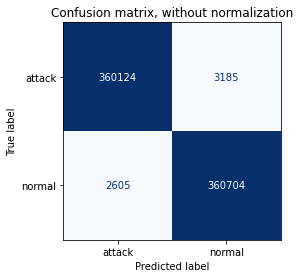

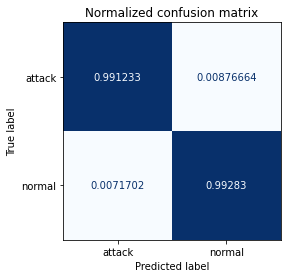

In [66]:
class_names = data.BiNom_Attack.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        log_model,
        X_train_smote,
        y_train_smote,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = 'g',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

0.9920315764266782


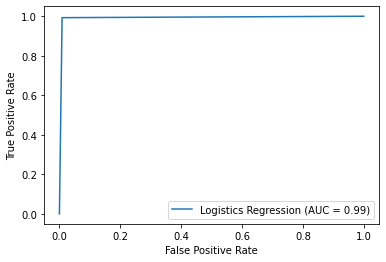

In [67]:
# train data roc_auc score and roc_auc curve 

print(roc_auc_score(y_train_smote, log_model.predict(X_train_smote)))

fpr, tpr, thresholds = roc_curve(y_train_smote,log_model.predict(X_train_smote))
roc_auc = auc(fpr,tpr)
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'Logistics Regression')
display.plot()
plt.show()

A good model will have high value of TPR and low value of FPR. Thus high TPR and low FPR will be plotted in the left top corner of the ROC curve. Then area under all the four points ((0,0), (1,0), (1,1) and (TPR,FPR)) is calculated. The percentage this area is of the square area is the AUC score of the model. Ideally, the model should have the AUC score equal to 100%. However, any model with AUC score between 0.9 - 1.0 is an excellent model. 

**Advantages of using ROC - Why should you use ROC and not metrics like lift curve?**

1. Lift is dependent on total response rate of the population. Hence, if the response rate of the population changes, the same model will give a different lift chart. A solution to this concern can be true lift chart (finding the ratio of lift and perfect model lift at each decile). But such ratio rarely makes sense for the business.


2. ROC curve on the other hand is almost independent of the response rate. This is because it has the two axis coming out from columnar calculations of confusion matrix. The numerator and denominator of both x and y axis will change on similar scale in case of response rate shift.

In [68]:
# test data classification report 

y_test_pred = log_model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    155705
           1       0.98      0.99      0.99     65034

    accuracy                           0.99    220739
   macro avg       0.99      0.99      0.99    220739
weighted avg       0.99      0.99      0.99    220739



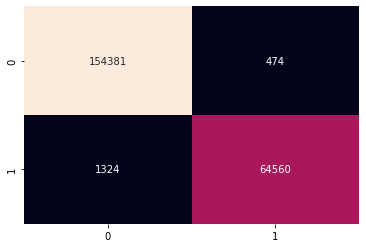

In [69]:
# test data confusion matrix

cm = confusion_matrix(y_test_pred, y_test)
cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
plt.show()

Confusion matrix, without normalization
[[154381   1324]
 [   474  64560]]
Normalized confusion matrix
[[0.99149674 0.00850326]
 [0.0072885  0.9927115 ]]


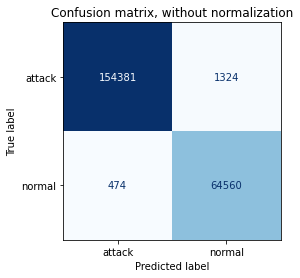

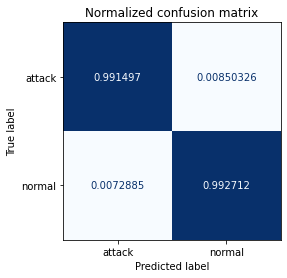

In [70]:
class_names = data.BiNom_Attack.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_test_pred,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = 'g',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


0.9884215729309277


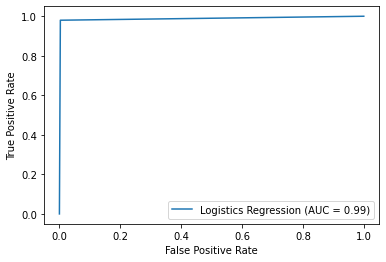

In [71]:
# test data roc_auc score and roc_auc curve 

print(roc_auc_score(y_test_pred, y_test))

fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)
roc_auc = auc(fpr,tpr)
display = RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc, estimator_name = 'Logistics Regression')
display.plot()
plt.show()

A perfect model for the data.

### Using LogisticRegressionCV 

In [72]:
# using LogisticRegressionCV with cv = 10 and solver and scoring parameters for better 
# evaluation of the model developed

logcv_model = LogisticRegressionCV(random_state = 0, solver = 'newton-cholesky', 
                                   scoring = 'roc_auc', cv = 10, 
                                  refit = True).fit(X_train_smote, y_train_smote)

In [73]:
y_train_pred_cv = logcv_model.predict(X_train_smote)
print(classification_report(y_train_smote, y_train_pred_cv))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    363309
           1       0.99      0.99      0.99    363309

    accuracy                           0.99    726618
   macro avg       0.99      0.99      0.99    726618
weighted avg       0.99      0.99      0.99    726618



In [74]:
y_test_pred_cv = logcv_model.predict(X_test)
print(classification_report(y_test, y_test_pred_cv))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    155705
           1       0.98      0.99      0.99     65034

    accuracy                           0.99    220739
   macro avg       0.99      0.99      0.99    220739
weighted avg       0.99      0.99      0.99    220739



### Hyperparameter C in Logistic Regression

<!-- The parameters are numbers that tell the model what to do with the features, whereas the hyperparameters instruct the model on how to choose those parameters. C hyper-parameter used in the LogisiticRegression is the value of ƛ (lambda) which is used in L2(Ridge), L1(Lasso) and ElasticNet. It is an important hyper-parameter to tune for logistic regression. This term imposes pressure on the model to seek smaller model weights or coefficient values. This is achieved by adding a weighted absolute sum or square of sums to the loss function thereby encouraging the model to reduce the size of the coefficents along with the error while fitting the model on the training data. The value of C changes the strength of the penalty from 0 to 1. Therefore, weighting of the coefficients in the penalty can be set via the C argument. However, in sklearn.LogisticRegression C is defined as C = 1/λ. Value of 1 indicates very strong penalty whereas value of 0 indicates zero penalty. 

Regularization generally refers the concept that there should be a complexity penalty for more extreme parameters or addition of new features. The idea is that just looking at the training data and not paying attention to how extreme one's parameters are, leads to overfitting. A high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty. A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data. Basically, a high C means "Trust this training data a lot", while a low value says "This data may not be fully representative of the real world data, so if it's telling you to make a parameter really large, don't listen to it".

Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. When you train a model such as a logistic regression model, you are choosing parameters that give you the best fit to the data to reduce the errors to the minimum. 

The problem comes when you have a lot of parameters (a lot of independent variables) but not too much data. In this case, the model will often tailor the parameter values to idiosyncrasies in your data -- which means it fits your data almost perfectly. However because those idiosyncrasies don't appear in future data you see, your model predicts poorly.

To solve this, as well as minimizing the error as already discussed, you add to what is minimized and also minimize a function that penalizes large values of the parameters. Most often the function is λFn, which is some constant λ times the Fn which is either sum of the squared coefficients in case of Ridge or sum of absolute value of coefficients in case of Lasso. The larger λ is the less likely it is that the parameters will be increased in magnitude simply to adjust for small perturbations in the data.  -->



### Using logit model in statsmodels.formula.api library to get the summary of logistics regression model. 

In [75]:
# changing names of columns as per INC naming conventions

X_binom_sc.rename(columns = {'flag_0.05':'flag_0dt05','service_0.01':'service_0dt01', 
                                'service_0.14':'service_0dt14',
                               'protocol_type_0.02':'protocol_type_0dt02'
                               },inplace = True)

# concatenating the data for the model
logit_model_train_data = pd.concat((X_train_smote, y_train_smote), axis = 1)
logit_model_test_data = pd.concat((X_test, y_test), axis = 1)

# build the model
logit_model = smf.logit(formula = 'Binom_Attack ~ ' + '+'.join(X_train_smote.columns), 
                        data = logit_model_train_data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.027614
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Binom_Attack   No. Observations:               726618
Model:                          Logit   Df Residuals:                   726602
Method:                           MLE   Df Model:                           15
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.9602
Time:                        07:10:42   Log-Likelihood:                -20065.
converged:                       True   LL-Null:                   -5.0365e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -2.3532      0.032    -72.528      0.000      -2.417      -2.290
dst_host_diff_srv_rate          0.8723      0.012     74.402      0.000       0.849       0.895
protocol_type_0dt02             0.5716      0.008     75.143      0.000       0.557       0.587
service_infrequent_sklearn      0.0952      0.015      6.399      0.000       0.066       0.124
flag_0dt05                      1.6687      0.010    163.379      0.000       1.649       1.689
src_bytes                       0.9725      0.011     88.841      0.000       0.951       0.994
dst_host_srv_diff_host_rate    -0.8378      0.011    -72.960      0.000      -0.860      -0.815
srv_diff_host_rate              0.1241      0.013      9.445      0.000       0.098       0.150
service_0dt01                  -1.5447      0.029    -52.433      0.000      -1.602      -1.487
dst_bytes                      -0.7537      0.045    -16.903      0.000      -0.841      -0.666
service_0dt14                  -1.1382      0.017    -66.468      0.000      -1.172      -1.105
srv_count                       0.4931      0.010     49.648      0.000       0.474       0.513
dst_host_serror_rate            6.3590      0.053    120.269      0.000       6.255       6.463
dst_host_same_src_port_rate     0.5594      0.010     56.791      0.000       0.540       0.579
diff_srv_rate                   0.5340      0.010     52.201      0.000       0.514       0.554
flag_infrequent_sklearn         0.6163      0.007     94.566      0.000       0.604       0.629
===============================================================================================

Possibly complete quasi-separation: A fraction 0.49 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

dst_host_srv_diff_host_rate, dst_host_serror_rate, dst_host_diff_srv_rate and src_bytes are having very high value of the coefficients. 

**What is complete separation and what do some of the most commonly used software packages do when it happens?**

<!-- A complete separation happens when the outcome variable separates a predictor variable or a combination of predictor variables completely. Albert and Anderson (1984) define this as, “there is a vector α that correctly allocates all observations to their group.” Below is a small example.

| Y | X1 | X2 |
|---|---|---|
| 0 | 1 | 3 |
| 0 | 2 | 2 |
| 0 | 3 | -1| 
| 0 | 3 | -1|
| 1 | 5 | 2 |
| 1 | 6 | 4 |
| 1 | 10| 1 |
| 1 | 11| 0 | 

In this example, Y is the outcome variable, X1 and X2 are predictor variables. We can see that observations with Y = 0 all have values of X1<=3 and observations with Y = 1 all have values of X1>3. In other words, Y separates X1 perfectly. The other way to see it is that X1 predicts Y perfectly since X1<=3 corresponds to Y = 0 and X1 > 3 corresponds to Y = 1. By chance, we have found a perfect predictor X1 for the outcome variable Y. In terms of predicted probabilities, we have Prob(Y = 1 | X1<=3) = 0 and Prob(Y=1 X1>3) = 1, without the need for estimating a model.

Complete separation or perfect prediction can occur for several reasons. One common example is when using several categorical variables whose categories are coded by indicators. For example, if one is studying an age-related disease (present/absent) and age is one of the predictors, there may be subgroups (e.g., women over 55) all of whom have the disease. Complete separation also may occur if there is a coding error or you mistakingly included another version of the outcome as a predictor. For example, we might have dichotomized a continuous variable X into a binary variable Y. We then wanted to study the relationship between Y and some predictor variables. If we would include X as a predictor variable, we would run into the problem of perfect prediction, since by definition, Y separates X completely. . The other possible scenario for complete separation to happen is when the sample size is very small. In our example data above, there is no reason for why Y has to be 0 when X1 is <=3. If the sample were large enough, we would probably have some observations with Y = 1 and X1 <=3, breaking up the complete separation of X1.

 On modelling, parameter estimate for X1 will be really large which might indicate the problem of complete or quasi separation. The standard errors for the parameter  will also be too large indicated a problem of convergence or some degree of data separation.  

**Quasi-complete separation** in a logistic/probit regression happens when the outcome variable separates a predictor variable or a combination of predictor variables to certain degree. Here is an example.

| Y | X1 | X2 |
|:--|--:|:---:|
| 0 | 1 | 3 |
| 0 | 2 | 0 |
| 0 | 3 | -1| 
| 0 | 3 | 4 |
| 1 | 3 | 1 |
| 1 | 4 | 0 |
| 1 | 5 | 2 |
| 1 | 6 | 7 | 
| 1 | 10| 3 |
| 1 | 11| 4 |


Notice that the outcome variable Y separates the predictor variable X1 pretty well except for values of X1 equal to 3. In other words, X1 predicts Y perfectly when X1 <3 (Y = 0) or X1 >3 (Y=1), leaving only when X1 = 3 as cases with uncertainty.  In terms of expected probabilities, we have Prob(Y=1 | X1<3) = 0 and Prob(Y=1 | X1>3) = 1, nothing to be estimated, except for Prob(Y = 1 | X1 = 3).

What happens when we try to fit a logistic or a probit regression model of Y on X1 and X2 using the data above? It turns out that the maximum likelihood estimate for X1 does not exist. With this example, the larger the parameter for X1, the larger the likelihood. In practice, a value of 15 or larger does not make much difference and they all basically correspond to predicted probability of 1. The behavior of different statistical software packages differ at how they deal with the issue of quasi-complete separation. -->

In [76]:
y_train_pred_logit = logit_model.predict(X_train_smote)
y_train_pred_logit_class = np.where(y_train_pred_logit > 0.5, 1, 0)
print(classification_report(y_train_smote, y_train_pred_logit_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    363309
           1       0.99      0.99      0.99    363309

    accuracy                           0.99    726618
   macro avg       0.99      0.99      0.99    726618
weighted avg       0.99      0.99      0.99    726618



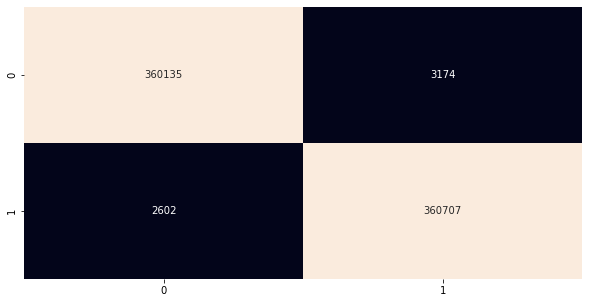

In [77]:
plt.figure(figsize = (10,5))
sns.heatmap(confusion_matrix(y_train_smote, y_train_pred_logit_class), annot = True, 
            cbar = False,fmt = 'g')
plt.show()

Confusion matrix, without normalization
[[360570   2739]
 [  3712 359597]]
Normalized confusion matrix
[[0.99246096 0.00753904]
 [0.0102172  0.9897828 ]]


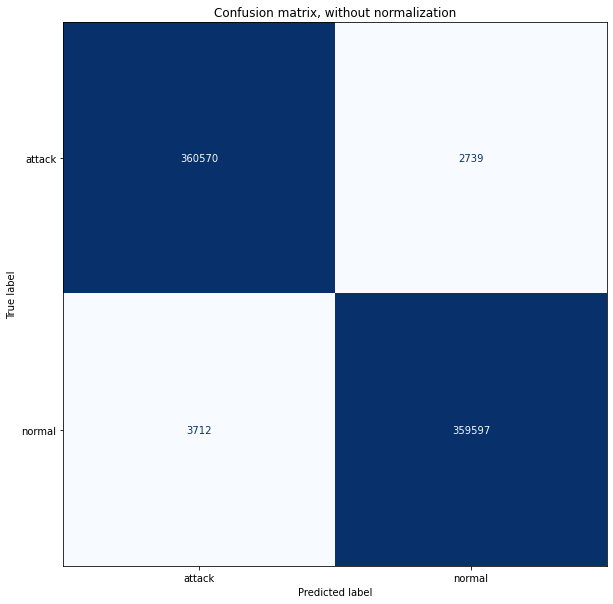

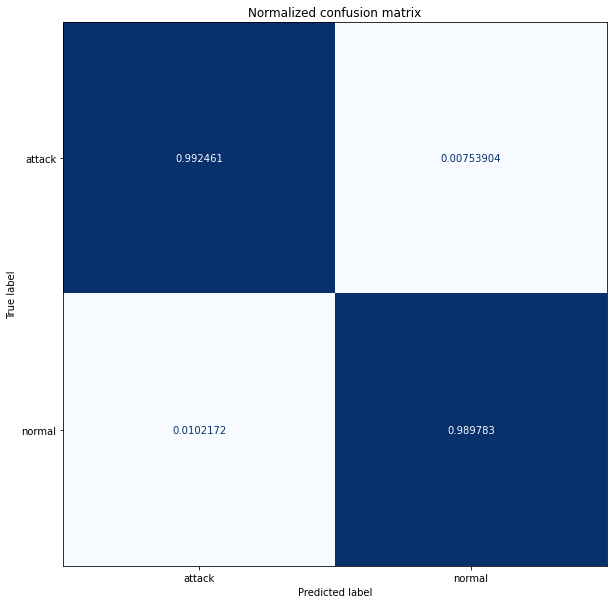

In [78]:
# changing threshold of probability for classification and plottign confusion matrix

class_names = data.BiNom_Attack.unique()
y_train_pred_logit_class = np.where(y_train_pred_logit > 0.6, 1, 0)

plt.rcParams['figure.figsize'] = (10,10)
# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_train_smote,
        y_train_pred_logit_class,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = 'g',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### From the above analysis, when we are changing the threshold for classifications there is not much change in accuracy from threshold 0.5 to 0.8/ 0.9. Therefore, we will keep the final threshold to 0.5 only. 

In [79]:
# manual calculation for Precision, Recall and F1-Score

tn, fp, fn, tp = confusion_matrix(y_train_smote, y_train_pred_logit_class).ravel()
Precision = round(tp / (tp + fp),2) # out of all predicted how many are actual 1
Recall = round(tp / (tp + fn),2) # out of all actual 1s how many are acutally predicted as 1
F1_Score = round(2 * (Precision * Recall) / (Precision + Recall),2)
print(f'Precision : {Precision} | Recall : {Recall} | F1_Score : {F1_Score}')

Precision : 0.99 | Recall : 0.99 | F1_Score : 0.99


In [80]:
y_test_pred_logit = logit_model.predict(X_test)
y_test_pred_logit = np.where(y_test_pred_logit > 0.5, 1, 0)
print(classification_report(y_test, y_test_pred_logit))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    155705
           1       0.98      0.99      0.99     65034

    accuracy                           0.99    220739
   macro avg       0.99      0.99      0.99    220739
weighted avg       0.99      0.99      0.99    220739



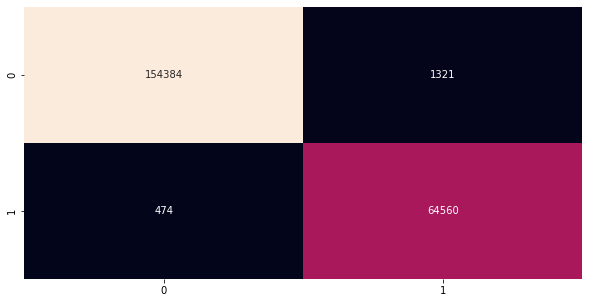

In [81]:
plt.figure(figsize = (10,5))
sns.heatmap(confusion_matrix(y_test, y_test_pred_logit), annot = True, 
            cbar = False,fmt = 'g')
plt.show()

In [82]:
# manual calculation for Precision, Recall and F1-Score for test data

tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred_logit).ravel()
Precision = round(tp / (tp + fp),2) # out of all predicted how many are actual 1
Recall = round(tp / (tp + fn),2) # out of all actual 1s how many are acutally predicted as 1
F1_Score = round(2 * (Precision * Recall) / (Precision + Recall),2)
print(f'Precision : {Precision} | Recall : {Recall} | F1_Score : {F1_Score}')

Precision : 0.98 | Recall : 0.99 | F1_Score : 0.98


### Calculating Feature Importance based on Somer's D value for each of the variable

Somer's Delta indicates how strong the relationship is between X and y. It's value ranges from -1 to 1. Higher the value, higher the relationship. Sign denotes the direction of the relationship. + sign means X and y are positivley correlated and - sign means that X and y are negatively correlated. 

In [83]:
lst = []

for col in X_binom_sc.columns:
    
    logreg = smf.logit(formula = 'Binom_Attack ~ ' + col, data=logit_model_train_data).fit()
    
    y_predict = logreg.predict()
    
    somers_d = 2 * roc_auc_score(logit_model_train_data['Binom_Attack'],y_predict)-1
    
    lst.append(somers_d)
    
var_significance = pd.DataFrame([X_binom_sc.columns, lst]).T
var_significance.sort_values(by = 1, ascending = False).reset_index(drop = True)

Optimization terminated successfully.
         Current function value: 0.326784
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.690389
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.637882
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.674899
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.470211
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.503406
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.590454
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.667340
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.352942
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.687876
 

,0,1
0,diff_srv_rate,0.95112
1,src_bytes,0.947213
2,dst_bytes,0.923833
3,dst_host_diff_srv_rate,0.904503
4,dst_host_serror_rate,0.851215
...,...,...
10,service_0dt01,0.087674
11,service_0dt14,0.028252
12,flag_infrequent_sklearn,0.017242
13,protocol_type_0dt02,0.01374


## diff_srv_rate, src_bytes, dst_bytes, dst_host_diff_srv_rate, dst_host_serror_rate and dst_host_same_src_port_rate are the most significant variables.

## Decile Analysis to evaluate the performance of the model and estimate the optimum cut-off threshold

In [84]:
# add column for predicted probabilities, predicted class based on the threshold
# and deciles in the data

logit_model_train_data['Pred_Prob'] = logit_model.predict()
logit_model_train_data['Decile'] = pd.qcut(logit_model_train_data['Pred_Prob'], 10, labels = False)

In [85]:
min_prob = logit_model_train_data.groupby(['Decile'])['Pred_Prob'].min().round(4).sort_index(ascending = False)
max_prob = logit_model_train_data.groupby(['Decile'])['Pred_Prob'].max().round(4).sort_index(ascending = False)
total_count = logit_model_train_data.groupby(['Decile'])['Binom_Attack'].count().sort_index(ascending = False)
ones = logit_model_train_data.groupby(['Decile'])['Binom_Attack'].sum().sort_index(ascending = False)

decile_analysis_train=pd.concat([min_prob, max_prob, ones, total_count-ones, total_count], axis=1)
decile_analysis_train.columns=['min_prob','max_prob','1s','0s','total']
decile_analysis_train['Response_Rate'] = (decile_analysis_train['1s'] * 100)/ decile_analysis_train['1s'].sum() 
decile_analysis_train['Cum_Res_Rate'] = round(np.cumsum(decile_analysis_train['Response_Rate']),3)
decile_analysis_train['Non_Response_Rate'] = (decile_analysis_train['0s']*100) / decile_analysis_train['0s'].sum() 
decile_analysis_train['Cum_Non_Res_Rate'] = round(np.cumsum(decile_analysis_train['Non_Response_Rate']),3)
decile_analysis_train['KS_Score'] = decile_analysis_train['Cum_Res_Rate'] - decile_analysis_train['Cum_Non_Res_Rate']

decile_analysis_train

,min_prob,max_prob,1s,0s,total,Response_Rate,Cum_Res_Rate,Non_Response_Rate,Cum_Non_Res_Rate,KS_Score
Decile,,,,,,,,,,
9,1.0000,1.0000,72195,59,72254,19.871514,19.872,0.016240,0.016,19.856
8,1.0000,1.0000,72337,6,72343,19.910600,39.782,0.001651,0.018,39.764
7,0.9999,1.0000,73219,1,73220,20.153368,59.935,0.000275,0.018,59.917
6,0.9999,0.9999,72808,3,72811,20.040241,79.976,0.000826,0.019,79.957
5,0.5619,0.9999,69840,2836,72676,19.223306,99.199,0.780603,0.800,98.399
4,0.0024,0.5618,2856,69811,72667,0.786108,99.985,19.215324,20.015,79.970
3,0.0014,0.0024,26,72635,72661,0.007156,99.992,19.992623,40.008,59.984
2,0.0007,0.0014,5,72657,72662,0.001376,99.994,19.998679,60.006,39.988
1,0.0002,0.0007,1,72661,72662,0.000275,99.994,19.999780,80.006,19.988


Since KS-score is 98.1 at 3rd decile or maximum response rate is achieved by 3rd Decile. Therefore, we can keep our cut-off threshold at 0.27 safely. 

In [86]:
kds.metrics.decile_table(y_train_smote,y_train_pred_logit)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,1.000,1.000,1.000,72662.0,72603.0,59.0,36330.9,72662,99.919,72662.0,72603.0,72662,59.0,10.0,19.984,20.0,0.016,19.968,1.998
1,2,1.000,1.000,1.000,72662.0,72656.0,6.0,36330.9,72662,99.992,145324.0,145259.0,145324,65.0,20.0,39.982,40.0,0.018,39.964,1.999
2,3,1.000,1.000,1.000,72662.0,72661.0,1.0,36330.9,72662,99.999,217986.0,217920.0,217986,66.0,30.0,59.982,60.0,0.018,59.964,1.999
3,4,1.000,1.000,1.000,72662.0,72659.0,3.0,36330.9,72662,99.996,290648.0,290579.0,290648,69.0,40.0,79.981,80.0,0.019,79.962,2.000
4,5,0.562,1.000,0.957,72661.0,69825.0,2836.0,36330.9,72661,96.097,363309.0,360404.0,363309,2905.0,50.0,99.200,100.0,0.800,98.400,1.984
5,6,0.002,0.562,0.039,72662.0,2851.0,69811.0,36330.9,0,3.924,435971.0,363255.0,363309,72716.0,60.0,99.985,100.0,20.015,79.970,1.666
6,7,0.001,0.002,0.002,72662.0,26.0,72636.0,36330.9,0,0.036,508633.0,363281.0,363309,145352.0,70.0,99.992,100.0,40.008,59.984,1.428
7,8,0.001,0.001,0.001,72662.0,5.0,72657.0,36330.9,0,0.007,581295.0,363286.0,363309,218009.0,80.0,99.994,100.0,60.006,39.988,1.250
8,9,0.000,0.001,0.000,72662.0,1.0,72661.0,36330.9,0,0.001,653957.0,363287.0,363309,290670.0,90.0,99.994,100.0,80.006,19.988,1.111
9,10,0.000,0.000,0.000,72661.0,22.0,72639.0,36330.9,0,0.030,726618.0,363309.0,363309,363309.0,100.0,100.000,100.0,100.000,0.000,1.000


#### We expect that the model should classify the attack with higher probability values, while the other class should have lower probabilities.

#### From the Decile analysis above, we can see that our model is performing good. As the value of predicted probability is decreasing so is the number of predicted 1s and as the value of predicted probability is increasing so is the number of predicted 1s. 

The classifier did such a good job that it could perfectly classify the 1s and 0s, in a manner that ordering by probability almost all the 1s were allocated on the first 4 deciles.

Therefore the model is predicting with very good accuracy. In case the model is not performing good, we can change the threshold of prediction so that all the correct predictions are done till first 3 - 4 deciles.

**Basic Interpretation of Decile Analysis**:- 

1. Maximum 1s should be predicted when the probability is high and above the threshold. 

2. Maximum 0s should be predicted when the probability is low and below the threshold. 

3. There should be clear distinction between the number of 1s and 0s being predicted when the probability transitions from high to low. 

In [87]:
def plot_gain(y_real, y_proba, ax = None, color = 'b', title = 'Gain Curve'):
    
    # Prepare the data
    aux_df = pd.DataFrame()
    aux_df['y_real'] = y_real
    aux_df['y_proba'] = y_proba
    
    # Sort by predicted probability
    aux_df = aux_df.sort_values('y_proba', ascending = False)
    
    # Find the total number of positive classes on the dataset
    total_positive_count = sum(aux_df['y_real'] == 1)
    
    # For each line of data, check if it is positive, add to the counter and calculate the gain
    gain = 0
    subset_positive_count = 0
    gain_values = []
    for i in aux_df.index:
        if aux_df.loc[i]['y_real'] == 1:
            subset_positive_count += 1
        gain = subset_positive_count / total_positive_count
        gain_values.append(gain)
    
    # Plot the gain curve
    if ax == None:
        ax = plt.axes()
    ax.set_xlabel('Proportion of sample')
    ax.set_ylabel('Gain')
    ax.set_title(title)
    sns.lineplot(x = [0, 1], y = [0,1], color = 'gray', linestyle = 'dashed', linewidth = 1, ax = ax)
    sns.lineplot(x = [x/len(gain_values) for x in range(len(gain_values))], y = gain_values, ax = ax, color = color)
    
    
# plot_gain(y_train_smote,y_train_pred_logit)

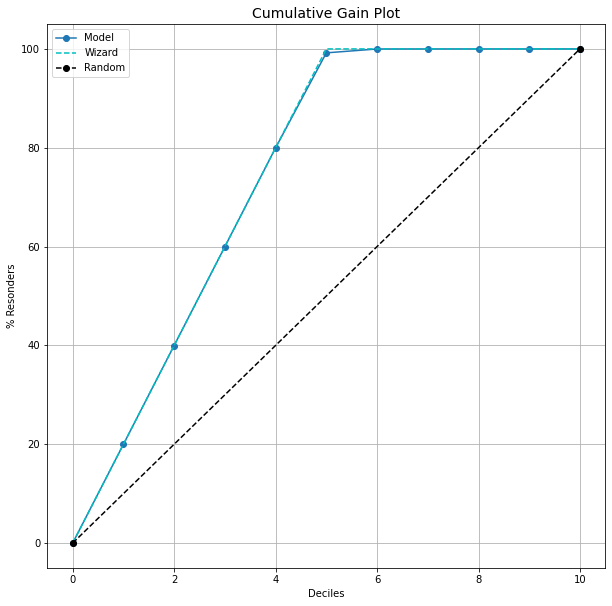

In [88]:
# same thing can be performed in single line of code using kds library

kds.metrics.plot_cumulative_gain(y_train_smote,y_train_pred_logit)

### The model has gained accuracy of almost 100% with only 35-40% of the samples. Therefore, the model is highly efficient. 

Trivia:- 

1. Cumulative gain curves are useful to measure the effort we can put in reaching people vs the return we might expect from this action, hence the name “gain”. 


2. With a good classifier, if we try to sell the product to the top 50% of the public, we would be able to find around 80% of the real buyers.


3. So we can focus our marketing efforts to these 50% of the people to get maximum profit with minimum of marketing investments. 

### Insights from the cumulative gain plot: 

1. This graph tells you how well the model is segregating 1s from 0s. For example, the first decile has 10% of the records, however, almost 34% of 1s. This means we have a 3.4 lift at first decile.


2. Further if we can select only the top 30% (decile 1,2 and 3) then we have coverage of nearly 99% of the target class.


3. As this is a cumulative plot, we see that the curve flattens after decile 3 which means the deciles 7 to 10 either have minimal records or none.


4. Ideally the model should have been between the wizard and random. Here our model is mimicking the wizard model. 

In [89]:
# def plot_lift(y_real, y_proba, ax = None, color = 'b', title = 'Lift Curve'):
    
#     # Prepare the data
#     aux_df = pd.DataFrame()
#     aux_df['y_real'] = y_real
#     aux_df['y_proba'] = y_proba
    
#     # Sort by predicted probability
#     aux_df = aux_df.sort_values('y_proba', ascending = False)
    
#     # Find the total positive ratio of the whole dataset
#     total_positive_ratio = sum(aux_df['y_real'] == 1) / aux_df.shape[0]
    
#     # For each line of data, get the ratio of positives of the given subset and calculate the lift
#     lift_values = []
#     for i in aux_df.index:
#         threshold = aux_df.loc[i]['y_proba']
#         subset = aux_df[aux_df['y_proba'] >= threshold]
#         subset_positive_ratio = sum(subset['y_real'] == 1) / subset.shape[0]
#         lift = subset_positive_ratio / total_positive_ratio
#         lift_values.append(lift)
    
#     # Plot the lift curve
#     if ax == None:
#         ax = plt.axes()
#     ax.set_xlabel('Proportion of sample')
#     ax.set_ylabel('Lift')
#     ax.set_title(title)
#     sns.lineplot(x = [x/len(lift_values) for x in range(len(lift_values))], y = lift_values, ax = ax, color = color)
#     ax.axhline(1, color = 'gray', linestyle = 'dashed', linewidth = 3)
    
# plot_lift(y_train,y_train_pred_logit) -- this method no longer required since same thing
# can be performed just using one line of code using kds library.

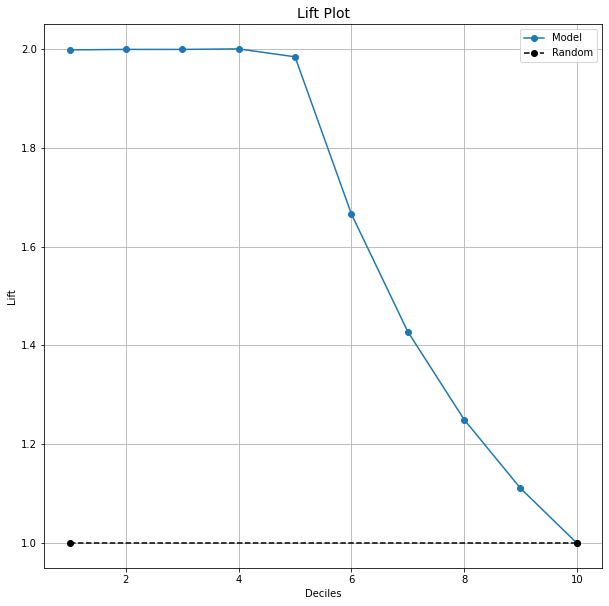

In [90]:
# plot lift for y_train and y_train_pred_logit

kds.metrics.plot_lift(y_train_smote,y_train_pred_logit)

**Lift Plot** :- This plot shows us how much better is logistic regression model as compared to the random model. Eg: decile 2 gives us a lift almost 3.5 times meaning we can do 3.5 times better than the random model approach. As we go to higher deciles the lift drops and eventually meets the random model line, this is because all the higher probability score values are in the top deciles (1 to 3) which we had already seen in the cumulative gains plot too. So, bottom deciles will have probabilities that are lower and almost the same as the random model.

What could have been the maximum lift in the first decile - if the model would have predicted perfectly then all 56980 values should have been correctly classified. The lift in this case should have been 56980/168569 = 33.8% approx. In our case the model is able to achieve the prediction rate of 33% in the first decile.

Further, the maximum lift in this case can be 57472/168569 = 3.4 - ie the maximum no of 1s in any decile divided by total no of 1s in all the deciles. Therefore, in the model the decile which has lift value approaching the maximum lift is a good decile ie model has predicted well in that decile. 

Lift / Gain charts are widely used in campaign targeting problems. This tells us till which decile can we target customers for an specific campaign. Also, it tells you how much response do you expect from the new target base.

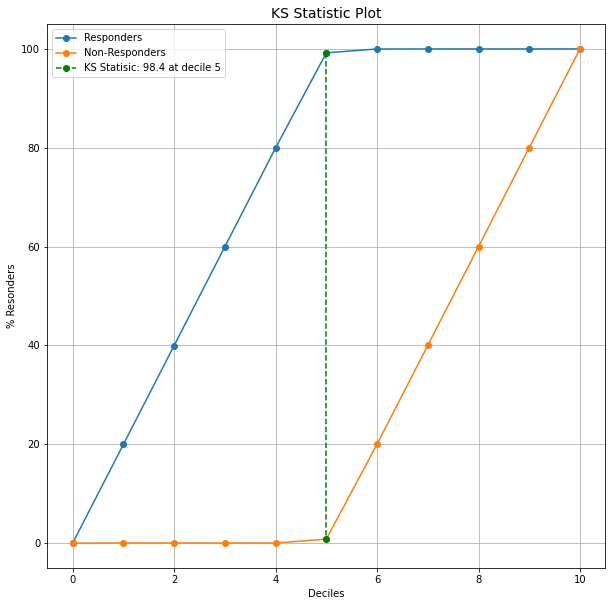

In [91]:
kds.metrics.plot_ks_statistic(y_train_smote,y_train_pred_logit)

### KS statistics is the measure of separation of two classes in the model. If the model is able to segregate two classes perfectly then the model is supposed to have KS score of 100. For a complete random model, the KS score would be 0. 

Higher the KS score for any classification model, better is the model accuracy in terms of segregating the two classes. 

The idea is a good model should have maximum KS score in as minimum decile number as possible. If the model is able to achieve maximum separation by 3rd or 4th decile then it is a good model. It is obtained by the difference of cumumlative percentages of 1s and 0s. As we go down the deciles, the difference will start to increase and upto certain decile it will continue to increase after which it will start decreasing. The value of percentage difference after which it starts decreasing is the KS Score. 

In our case, maximum separation is happening at the 3rd decile with the KS score of 98.054. 

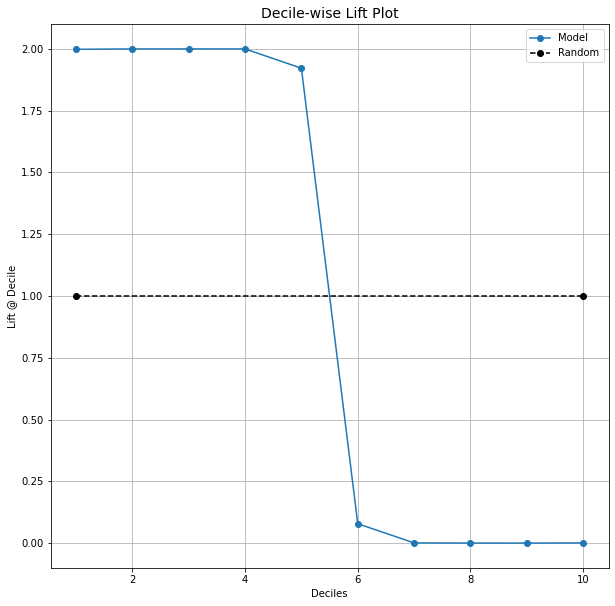

In [92]:
kds.metrics.plot_lift_decile_wise(y_train_smote,y_train_pred_logit)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,1.000,1.000,1.000,72662.0,72603.0,59.0,36330.9,72662,99.919,72662.0,72603.0,72662,59.0,10.0,19.984,20.0,0.016,19.968,1.998
1,2,1.000,1.000,1.000,72662.0,72656.0,6.0,36330.9,72662,99.992,145324.0,145259.0,145324,65.0,20.0,39.982,40.0,0.018,39.964,1.999
2,3,1.000,1.000,1.000,72662.0,72661.0,1.0,36330.9,72662,99.999,217986.0,217920.0,217986,66.0,30.0,59.982,60.0,0.018,59.964,1.999
3,4,1.000,1.000,1.000,72662.0,72659.0,3.0,36330.9,72662,99.996,290648.0,290579.0,290648,69.0,40.0,79.981,80.0,0.019,79.962,2.000
4,5,0.562,1.000,0.957,72661.0,69825.0,2836.0,36330.9,72661,96.097,363309.0,360404.0,363309,2905.0,50.0,99.200,100.0,0.800,98.400,1.984
5,6,0.002,0.562,0.039,72662.0,2851.0,69811.0,36330.9,0,3.924,435971.0,363255.0,363309,72716.0,60.0,99.985,100.0,20.015,79.970,1.666
6,7,0.001,0.002,0.002,72662.0,26.0,72636.0,36330.9,0,0.036,508633.0,363281.0,363309,145352.0,70.0,99.992,100.0,40.008,59.984,1.428
7,8,0.001,0.001,0.001,72662.0,5.0,72657.0,36330.9,0,0.007,581295.0,363286.0,363309,218009.0,80.0,99.994,100.0,60.006,39.988,1.250
8,9,0.000,0.001,0.000,72662.0,1.0,72661.0,36330.9,0,0.001,653957.0,363287.0,363309,290670.0,90.0,99.994,100.0,80.006,19.988,1.111
9,10,0.000,0.000,0.000,72661.0,22.0,72639.0,36330.9,0,0.030,726618.0,363309.0,363309,363309.0,100.0,100.000,100.0,100.000,0.000,1.000


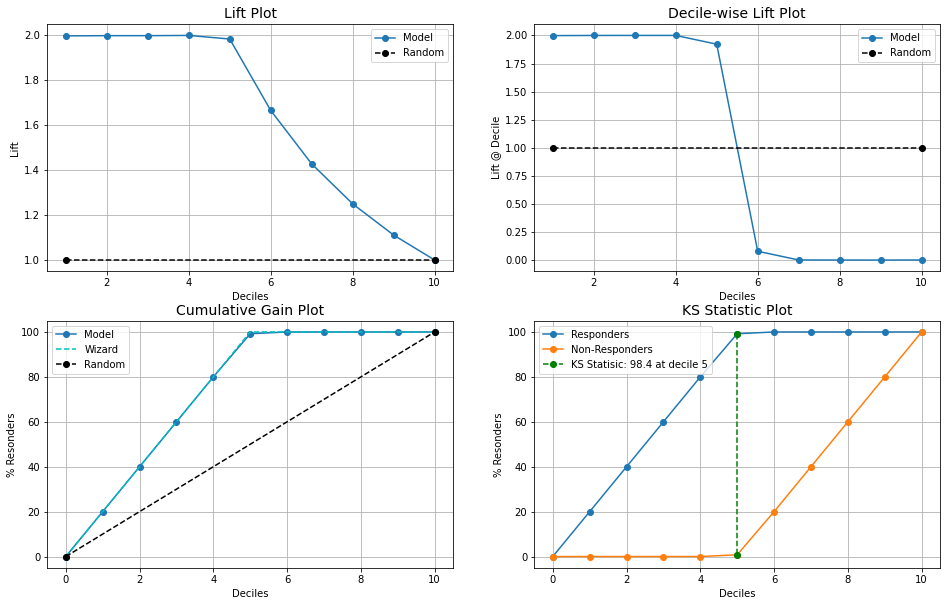

In [93]:
# get everything with just one line of code.

kds.metrics.report(y_train_smote,y_train_pred_logit)

**Decile-wise Lift Plot** :- This plot shows us the percentage of the target class observation in each of the deciles and we observe that decile 1 had maximum and as we go higher deciles the percentage drops and after a certain point it even goes below random model line. This is because the random model has equally distributed observations that are randomly set whereas our model has predicted fewer observations in the higher deciles.


**KS Statistic Plot** :- The KS plot evaluates different distributions i.e events and non-events and the KS value is a point where the difference is maximum between the distributions. In short, it helps us in understanding the ability of the ML model to differentiate between two events. The KS score greater than 40 and if it happens to be in the top 3 deciles then it is considered to be good. In our case, we have a score of 98.054 and decile 3 from the plot.

# Testing the model on the Validation Set

In [94]:
# make a separate copy of validation set for work
val_work = val.copy() 

# drop variables with zero values
val_work.drop(['land','root_shell','su_attempted','is_host_login','is_guest_login'], axis = 1, inplace = True)
val_work['logged_in'] = val['logged_in'].astype('category')
val_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81756 entries, 643018 to 121958
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   duration                     81756 non-null  float64 
 1   protocol_type                81756 non-null  category
 2   service                      81756 non-null  category
 3   flag                         81756 non-null  category
 4   src_bytes                    81756 non-null  float64 
 5   dst_bytes                    81756 non-null  float64 
 6   wrong_fragment               81756 non-null  float64 
 7   urgent                       81756 non-null  float64 
 8   hot                          81756 non-null  float64 
 9   num_failed_logins            81756 non-null  float64 
 10  logged_in                    81756 non-null  category
 11  num_compromised              81756 non-null  float64 
 12  num_root                     81756 non-null  float64 


In [95]:
# continous variable
cont_data_val = val_work.select_dtypes(['float64', 'int64'])
cont_data_val = cont_data_val.apply(lambda x : x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
cont_data_val.drop(drop_col, axis = 1, inplace = True)
cont_data_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81756 entries, 643018 to 121958
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     81756 non-null  float64
 1   src_bytes                    81756 non-null  float64
 2   dst_bytes                    81756 non-null  float64
 3   count                        81756 non-null  float64
 4   srv_count                    81756 non-null  float64
 5   serror_rate                  81756 non-null  float64
 6   srv_error_rate               81756 non-null  float64
 7   rerror_rate                  81756 non-null  float64
 8   srv_rerror_rate              81756 non-null  float64
 9   same_srv_rate                81756 non-null  float64
 10  diff_srv_rate                81756 non-null  float64
 11  srv_diff_host_rate           81756 non-null  float64
 12  dst_host_count               81756 non-null  float64
 13  dst_host_s

In [96]:
# categorical variable
cat_var_val = val_work.select_dtypes('category')
encoded_cat_data_val = pd.DataFrame(encoded.transform(cat_var_val), index = cat_var_val.index, columns = ohe.get_feature_names_out())
encoded_cat_data_val.head()

,protocol_type_0.01,protocol_type_0.02,service_0.01,service_0.02,service_0.12,service_0.14,service_infrequent_sklearn,flag_0.05,flag_0.07,flag_infrequent_sklearn,logged_in_0.1
643018,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
226830,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
762,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
540545,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [97]:
# merging categorical and continuous variables

binom_data_val = pd.concat([cont_data_val, encoded_cat_data_val], axis = 1)
binom_data_val['Binom_Attack'] = np.where(val['BiNom_Attack'] == 'attack', 1, 0)
binom_data_val.shape

(81756, 34)

In [98]:
# segregating X and y 
X_binom_val = binom_data_val.select_dtypes('float64')
y_binom_val = binom_data_val['Binom_Attack']
print(X_binom_val.shape)
X_binom_val.head()

(81756, 33)


,duration,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_0.01,protocol_type_0.02,service_0.01,service_0.02,service_0.12,service_0.14,service_infrequent_sklearn,flag_0.05,flag_0.07,flag_infrequent_sklearn,logged_in_0.1
643018,0.0000,0.00000,0.00000,0.279,0.010,0.1,0.1,0.0,0.0,0.004,0.006,0.0,0.255,0.010,0.004,0.007,0.000,0.000,0.1,0.1,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
226830,0.0016,0.00865,0.02586,0.001,0.001,0.0,0.0,0.0,0.0,0.100,0.000,0.0,0.186,0.042,0.023,0.038,0.001,0.000,0.0,0.0,0.035,0.002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
762,0.0000,0.00008,0.00000,0.001,0.018,0.0,0.0,0.0,0.0,0.100,0.000,0.1,0.002,0.174,0.100,0.000,0.100,0.018,0.0,0.0,0.000,0.000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
540545,0.0000,0.00030,0.00000,0.002,0.002,0.0,0.0,0.0,0.0,0.100,0.000,0.0,0.155,0.155,0.100,0.000,0.100,0.000,0.0,0.0,0.000,0.000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50800,0.0000,0.00289,0.02804,0.003,0.003,0.0,0.0,0.0,0.0,0.100,0.000,0.0,0.014,0.160,0.100,0.000,0.007,0.004,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


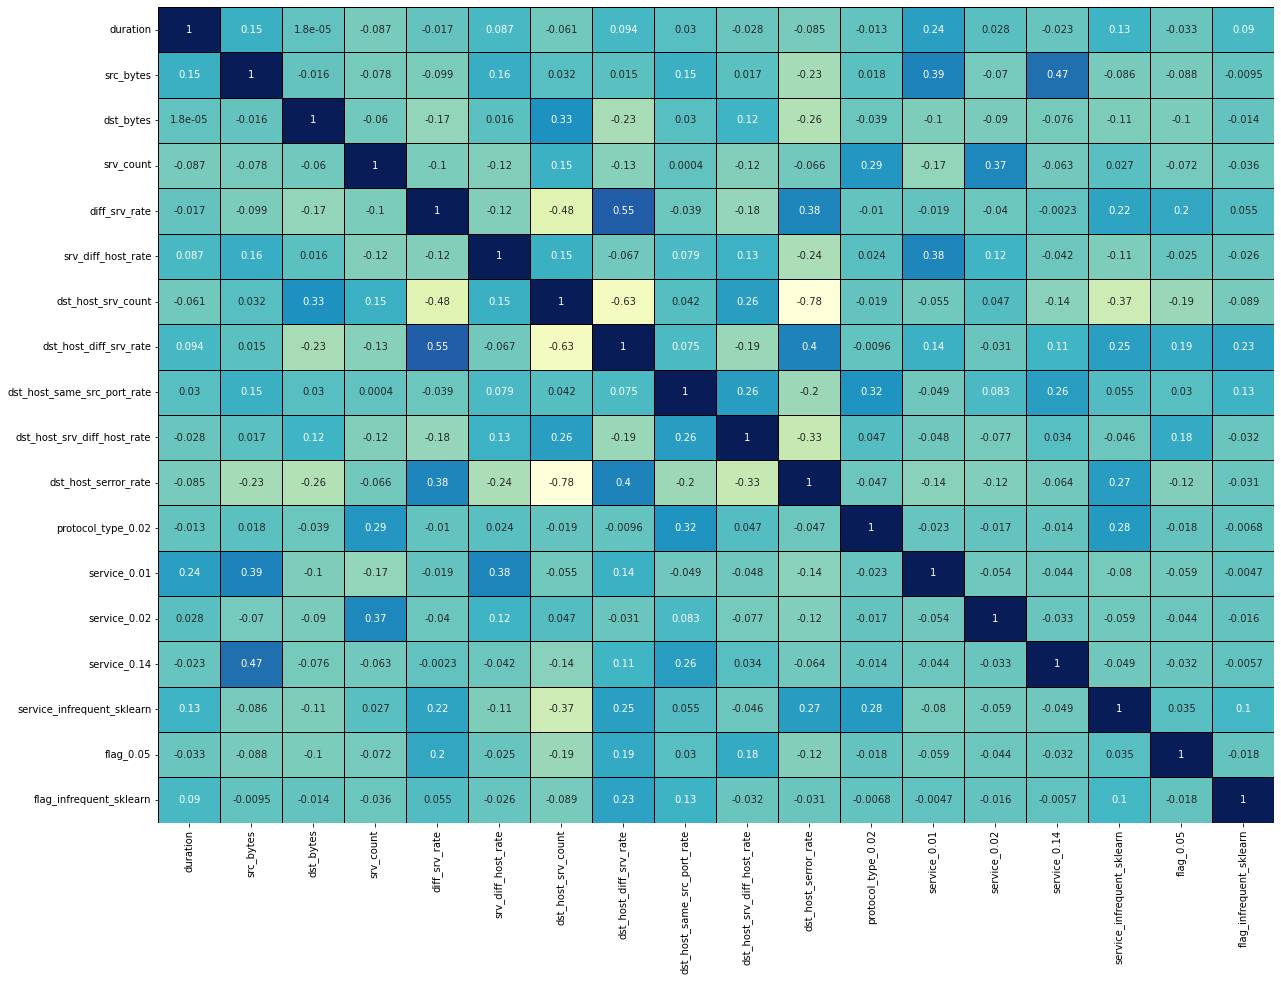

In [99]:
# plotting the correlation matrix after VIF treatment 
plt.figure(figsize = (20,15))
X_binom_val_vif = X_binom_val[features_calc_vif]
sns.heatmap(X_binom_val_vif.corr(), annot = True, cmap = "YlGnBu" , cbar = False, 
            linecolor = 'black', linewidths = 0.5)
plt.show()

In [100]:
# dropping dst_host_srv_count and duration from X_binom_vif
X_binom_val_vif.drop(columns = ['dst_host_srv_count', 'duration'], axis = 1, inplace = True)
print(X_binom_val_vif.shape)
X_binom_val_vif.columns

(81756, 16)


Index(['src_bytes', 'dst_bytes', 'srv_count', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'protocol_type_0.02', 'service_0.01',
       'service_0.02', 'service_0.14', 'service_infrequent_sklearn',
       'flag_0.05', 'flag_infrequent_sklearn'],
      dtype='object')

In [101]:
# selecting most significant features for the model

X_binom_val_featSel = X_binom_val_vif[final_features]
print(X_binom_val.shape,'\n',X_binom_val_vif.shape,'\n',X_binom_val_featSel.shape)
X_binom_val_featSel.info()

(81756, 33) 
 (81756, 16) 
 (81756, 15)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 81756 entries, 643018 to 121958
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dst_host_diff_srv_rate       81756 non-null  float64
 1   protocol_type_0.02           81756 non-null  float64
 2   service_infrequent_sklearn   81756 non-null  float64
 3   flag_0.05                    81756 non-null  float64
 4   src_bytes                    81756 non-null  float64
 5   dst_host_srv_diff_host_rate  81756 non-null  float64
 6   srv_diff_host_rate           81756 non-null  float64
 7   service_0.01                 81756 non-null  float64
 8   dst_bytes                    81756 non-null  float64
 9   service_0.14                 81756 non-null  float64
 10  srv_count                    81756 non-null  float64
 11  dst_host_serror_rate         81756 non-null  float64
 12  dst_host_same_src_port_rate 

In [102]:
# Standard Scaling of X variables

cols = X_binom_val_featSel.columns
index = X_binom_val_featSel.index

X_binom_val_sc = pd.DataFrame((sc.transform(X_binom_val_featSel)), index = index, columns = cols)
X_binom_val_sc.head()

,dst_host_diff_srv_rate,protocol_type_0.02,service_infrequent_sklearn,flag_0.05,src_bytes,dst_host_srv_diff_host_rate,srv_diff_host_rate,service_0.01,dst_bytes,service_0.14,srv_count,dst_host_serror_rate,dst_host_same_src_port_rate,diff_srv_rate,flag_infrequent_sklearn
643018,0.757852,-0.082832,3.380955,-0.222842,-0.404662,-0.568419,-0.427148,-0.265523,-0.460947,-0.166355,-0.157534,1.745057,-0.352060,0.503146,-0.082206
226830,6.639046,-0.082832,3.380955,-0.222842,0.646440,-0.568419,-0.427148,-0.265523,0.058982,-0.166355,-0.683969,-0.577333,-0.294726,-0.375733,-0.082206
762,-0.570159,12.072618,3.380955,-0.222842,-0.394941,5.900508,3.820019,-0.265523,-0.460947,-0.166355,0.310408,-0.577333,5.381281,-0.375733,-0.082206
540545,-0.570159,12.072618,3.380955,-0.222842,-0.368208,-0.568419,-0.427148,-0.265523,-0.460947,-0.166355,-0.625477,-0.577333,5.381281,-0.375733,-0.082206
50800,-0.570159,-0.082832,-0.295774,-0.222842,-0.053485,0.869120,-0.427148,-0.265523,0.102812,-0.166355,-0.566984,-0.577333,0.049274,-0.375733,-0.082206


In [103]:
# changing names of columns as per INC naming conventions

X_binom_val_sc.rename(columns = {'flag_0.05':'flag_0dt05','service_0.01':'service_0dt01', 
                                'service_0.14':'service_0dt14',
                               'protocol_type_0.02':'protocol_type_0dt02'
                               },inplace = True)

# fit the model

y_binom_val_pred = log_model.predict(X_binom_val_sc)
print(classification_report(y_binom_val, y_binom_val_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     57696
           1       0.98      0.99      0.98     24060

    accuracy                           0.99     81756
   macro avg       0.99      0.99      0.99     81756
weighted avg       0.99      0.99      0.99     81756



Confusion matrix, without normalization
[[57137   559]
 [  169 23891]]
Normalized confusion matrix
[[0.99031129 0.00968871]
 [0.00702411 0.99297589]]


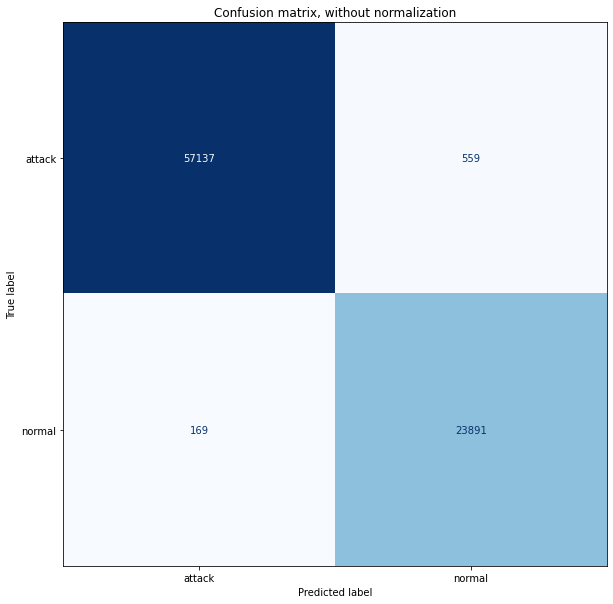

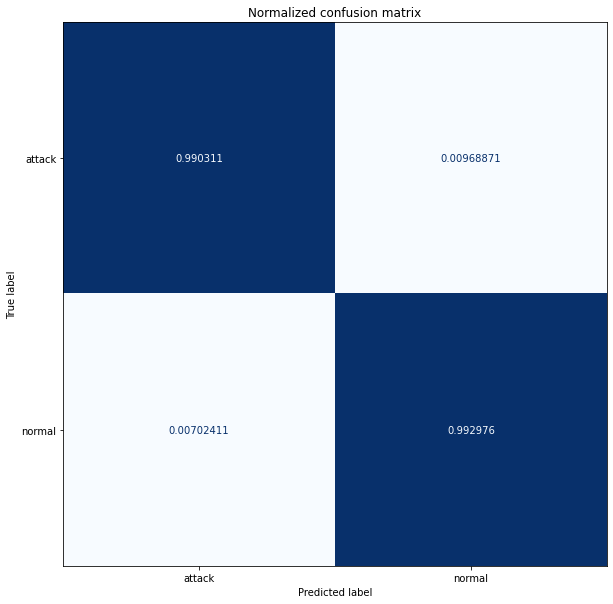

In [104]:
class_names = data.BiNom_Attack.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        log_model,
        X_binom_val_sc,
        y_binom_val,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = 'g',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,1.0,1.0,1.000,8176.0,7977.0,199.0,2406.0,8176,97.566,8176.0,7977.0,8176,199.0,10.000,33.155,33.982,0.345,32.810,3.316
1,2,1.0,1.0,1.000,8176.0,7995.0,181.0,2406.0,8176,97.786,16352.0,15972.0,16352,380.0,20.001,66.384,67.963,0.659,65.725,3.319
2,3,0.0,1.0,0.991,8175.0,7919.0,256.0,2406.0,7708,96.869,24527.0,23891.0,24060,636.0,30.000,99.298,100.000,1.102,98.196,3.310
3,4,0.0,0.0,0.000,8176.0,22.0,8154.0,2406.0,0,0.269,32703.0,23913.0,24060,8790.0,40.001,99.389,100.000,15.235,84.154,2.485
4,5,0.0,0.0,0.000,8176.0,26.0,8150.0,2406.0,0,0.318,40879.0,23939.0,24060,16940.0,50.001,99.497,100.000,29.361,70.136,1.990
5,6,0.0,0.0,0.000,8175.0,18.0,8157.0,2406.0,0,0.220,49054.0,23957.0,24060,25097.0,60.000,99.572,100.000,43.499,56.073,1.660
6,7,0.0,0.0,0.000,8176.0,24.0,8152.0,2406.0,0,0.294,57230.0,23981.0,24060,33249.0,70.001,99.672,100.000,57.628,42.044,1.424
7,8,0.0,0.0,0.000,8175.0,22.0,8153.0,2406.0,0,0.269,65405.0,24003.0,24060,41402.0,80.000,99.763,100.000,71.759,28.004,1.247
8,9,0.0,0.0,0.000,8176.0,30.0,8146.0,2406.0,0,0.367,73581.0,24033.0,24060,49548.0,90.001,99.888,100.000,85.878,14.010,1.110
9,10,0.0,0.0,0.000,8175.0,27.0,8148.0,2406.0,0,0.330,81756.0,24060.0,24060,57696.0,100.000,100.000,100.000,100.000,0.000,1.000


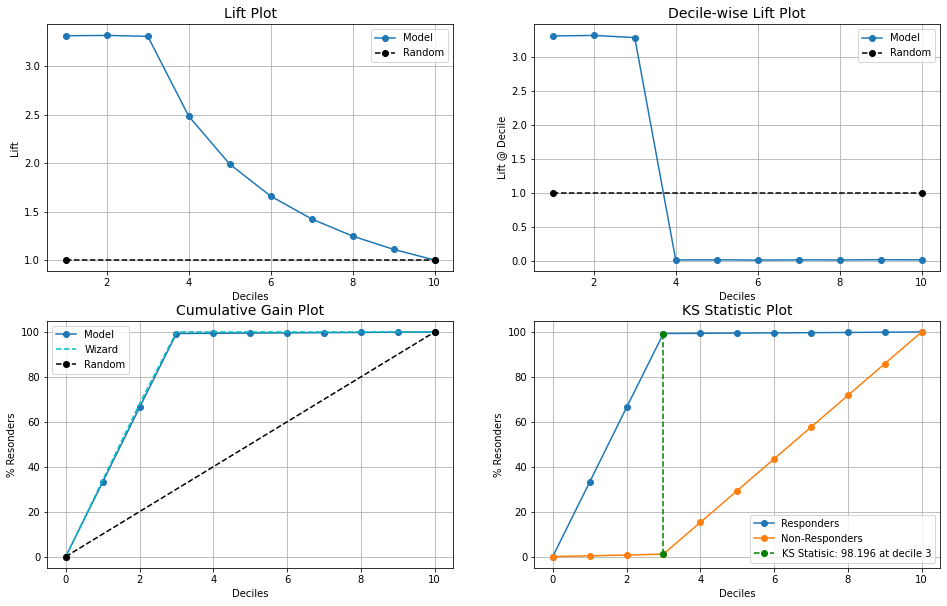

In [105]:
# Evaluation of the model on the Validation set of the data

kds.metrics.report(y_binom_val, y_binom_val_pred)

# Multinomial Classification

In LogisticRegression make multinomial parameter as 'multinomial' with suitable solver like 'lbfgs' etc. 

In [106]:
multinomial_data = data.copy()
multinomial_data.drop('BiNom_Attack', axis = 1, inplace = True)
print(multinomial_data.shape)
multinomial_data.Attack_Type.value_counts()

(817551, 42)


normal       576710
neptune      227228
satan          5019
smurf          3007
psweep         2964
              ...  
back            968
guess_pw         53
bbo              30
rootkit          10
ftp_write         8
Name: Attack_Type, Length: 11, dtype: int64

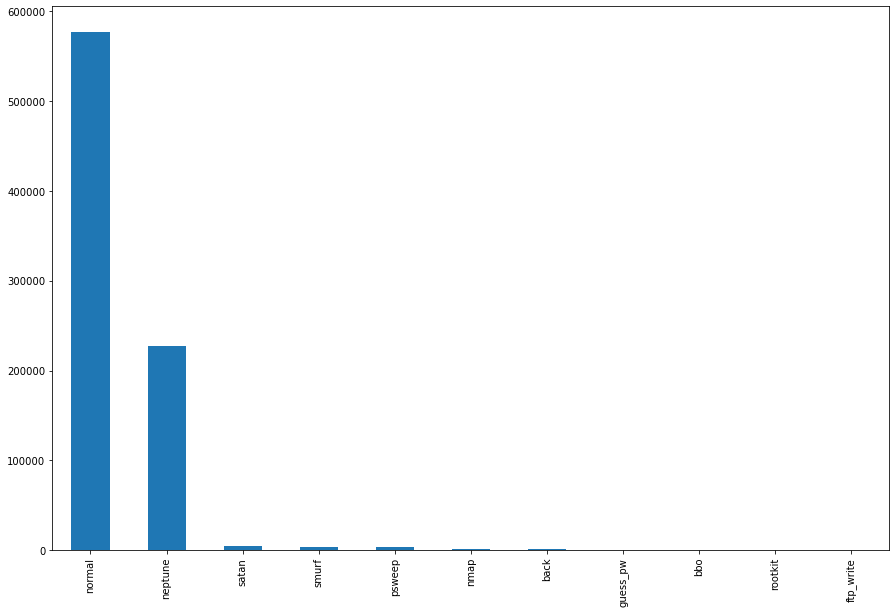

In [107]:
plt.figure(figsize = (15,10))
multinomial_data.Attack_Type.value_counts().plot(kind = 'bar')
plt.show()

### This is a problem of severe class imbalance. 

However to deal with it we will use class-weights in logistic regression with cv as StratifiedKFold() for better F1 score. 

### In case of class imbalance in the data, never use Accuracy as the metric for model evaluation. Use F1 score which is much more reliable evaluation metric for the model. 

In [108]:
# dropping zero variance columsn / columns with all zero values
multinomial_data.drop(['land','root_shell','su_attempted','is_host_login','is_guest_login'], axis = 1, inplace = True)
multinomial_data['logged_in'] = multinomial_data['logged_in'].astype('category')
multinomial_data.shape

(817551, 37)

In [109]:
# continous variable - outlier treatment and drop columns with zero variance/ all zero values

cont_data_multinom = multinomial_data.select_dtypes(['float64', 'int64'])
cont_data_multinom = cont_data_multinom.apply(lambda x : x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
cont_data_multinom.drop(drop_col, axis = 1, inplace = True)
cont_data_multinom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   src_bytes                    817551 non-null  float64
 2   dst_bytes                    817551 non-null  float64
 3   count                        817551 non-null  float64
 4   srv_count                    817551 non-null  float64
 5   serror_rate                  817551 non-null  float64
 6   srv_error_rate               817551 non-null  float64
 7   rerror_rate                  817551 non-null  float64
 8   srv_rerror_rate              817551 non-null  float64
 9   same_srv_rate                817551 non-null  float64
 10  diff_srv_rate                817551 non-null  float64
 11  srv_diff_host_rate           817551 non-null  float64
 12  dst_host_count               817551 non-null  float64
 13 

In [110]:
# EDA for continuous variables
cont_data_multinom.apply(eda)

,duration,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
Total,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000,817551.000000
TotalMissing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PercMissing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mean,0.000026,0.003335,0.022910,0.058843,0.012692,0.024833,0.024929,0.005355,0.005313,0.073479,0.002566,0.010064,0.166868,0.161651,0.066795,0.003018,0.006148,0.001582,0.024865,0.024852,0.005372,0.005279
Std,0.000172,0.008239,0.049703,0.088212,0.017105,0.043074,0.043153,0.022330,0.022215,0.041790,0.006830,0.023558,0.102058,0.111642,0.043421,0.005348,0.017460,0.002782,0.043062,0.043151,0.021920,0.022070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P75,0.000000,0.002990,0.019690,0.106000,0.016000,0.015000,0.017000,0.000000,0.000000,0.100000,0.005000,0.008000,0.255000,0.255000,0.100000,0.006000,0.003000,0.002000,0.014000,0.003000,0.000000,0.000000
P95,0.000000,0.011540,0.117620,0.263000,0.036000,0.100000,0.100000,0.094000,0.100000,0.100000,0.007000,0.071000,0.255000,0.255000,0.100000,0.009000,0.035000,0.006000,0.100000,0.100000,0.076000,0.087000
P99,0.001500,0.070120,0.309337,0.296000,0.131000,0.100000,0.100000,0.100000,0.100000,0.100000,0.057000,0.100000,0.255000,0.255000,0.100000,0.040000,0.100000,0.018000,0.100000,0.100000,0.100000,0.100000
Max,0.001500,0.070120,0.309345,0.296000,0.131000,0.100000,0.100000,0.100000,0.100000,0.100000,0.057000,0.100000,0.255000,0.255000,0.100000,0.040000,0.100000,0.018000,0.100000,0.100000,0.100000,0.100000


In [111]:
# categorical variables

cat_data_multinom = multinomial_data.select_dtypes('category')
encoded_cat_data_multinom = pd.DataFrame(encoded.transform(cat_data_multinom), index = cat_data_multinom.index, columns = ohe.get_feature_names_out())
encoded_cat_data_multinom.head()


,protocol_type_0.01,protocol_type_0.02,service_0.01,service_0.02,service_0.12,service_0.14,service_infrequent_sklearn,flag_0.05,flag_0.07,flag_infrequent_sklearn,logged_in_0.1
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [112]:
# merging categorical and continuous variables

multinom_data = pd.concat([cont_data_multinom, encoded_cat_data_multinom], axis = 1)
multinom_data['Attack_Type'] = data['Attack_Type']
multinom_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   src_bytes                    817551 non-null  float64
 2   dst_bytes                    817551 non-null  float64
 3   count                        817551 non-null  float64
 4   srv_count                    817551 non-null  float64
 5   serror_rate                  817551 non-null  float64
 6   srv_error_rate               817551 non-null  float64
 7   rerror_rate                  817551 non-null  float64
 8   srv_rerror_rate              817551 non-null  float64
 9   same_srv_rate                817551 non-null  float64
 10  diff_srv_rate                817551 non-null  float64
 11  srv_diff_host_rate           817551 non-null  float64
 12  dst_host_count               817551 non-null  float64
 13 

In [113]:
# segregating X and y 

X_multinom = multinom_data.select_dtypes('float64')
y_multinom = multinom_data['Attack_Type']
print(X_multinom.shape)
X_multinom.head()


(817551, 33)


,duration,src_bytes,dst_bytes,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_0.01,protocol_type_0.02,service_0.01,service_0.02,service_0.12,service_0.14,service_infrequent_sklearn,flag_0.05,flag_0.07,flag_infrequent_sklearn,logged_in_0.1
0,0.0015,0.01511,0.02957,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.003,0.1,0.0,0.10,0.018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0015,0.01735,0.02766,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.004,0.1,0.0,0.05,0.018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0015,0.01587,0.06707,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0015,0.02328,0.04551,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.001,0.001,0.1,0.0,0.10,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0015,0.01567,0.03095,0.001,0.001,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.002,0.002,0.1,0.0,0.05,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


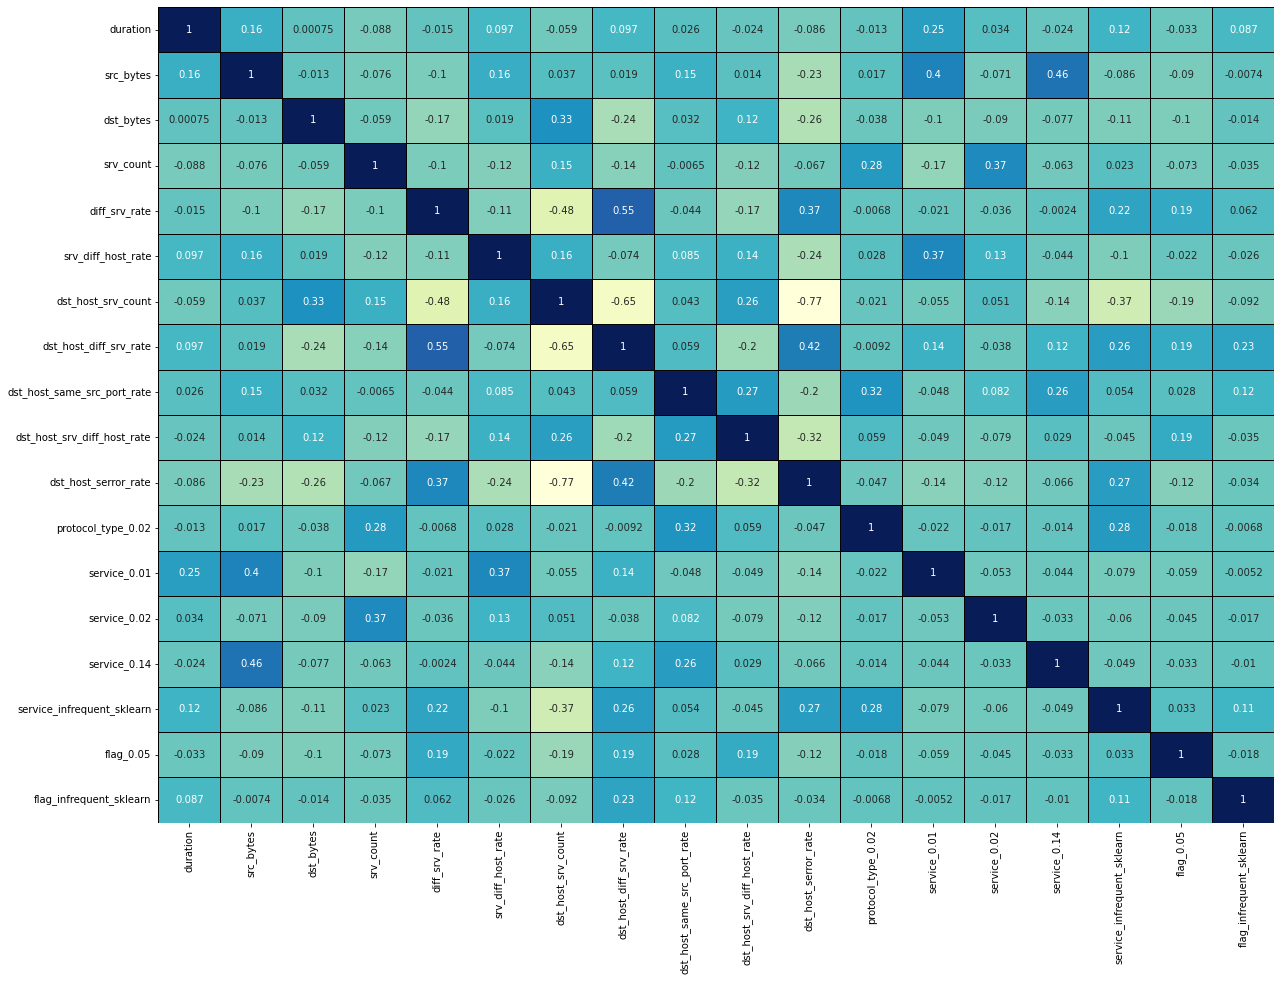

In [114]:
# plotting the correlation matrix after VIF treatment 

plt.figure(figsize = (20,15))
X_multinom_vif = X_multinom[features_calc_vif]
sns.heatmap(X_multinom_vif.corr(), annot = True, cmap = "YlGnBu" , cbar = False, 
            linecolor = 'black', linewidths = 0.5)
plt.show()


In [115]:
# checking the variables with high multi-collinearity from the correlation maxtrix of X_binom_vif

corrm = X_multinom_vif.corr()
corr_x_x=corrm.unstack().sort_values().drop_duplicates().reset_index()
corr_x_x=corr_x_x.loc[(corr_x_x[0]>0.60) | (corr_x_x[0]<-0.60)]['level_0'].drop_duplicates()
corr_x_x


0      dst_host_srv_count
153              duration
Name: level_0, dtype: object

In [116]:
# dropping dst_host_srv_count and duration from X_multinom_vif

X_multinom_vif.drop(columns = ['dst_host_srv_count', 'duration'], axis = 1, inplace = True)
print(X_multinom_vif.shape)
X_multinom_vif.columns


(817551, 16)


Index(['src_bytes', 'dst_bytes', 'srv_count', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'protocol_type_0.02', 'service_0.01',
       'service_0.02', 'service_0.14', 'service_infrequent_sklearn',
       'flag_0.05', 'flag_infrequent_sklearn'],
      dtype='object')

In [117]:
# selecting most significant features for the model

X_multinom_vif_featSel = X_multinom_vif[final_features]
print(X_multinom.shape,'\n',X_multinom_vif.shape,'\n',X_multinom_vif_featSel.shape)
X_multinom_vif_featSel.info()


(817551, 33) 
 (817551, 16) 
 (817551, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817551 entries, 0 to 817550
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   dst_host_diff_srv_rate       817551 non-null  float64
 1   protocol_type_0.02           817551 non-null  float64
 2   service_infrequent_sklearn   817551 non-null  float64
 3   flag_0.05                    817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_host_srv_diff_host_rate  817551 non-null  float64
 6   srv_diff_host_rate           817551 non-null  float64
 7   service_0.01                 817551 non-null  float64
 8   dst_bytes                    817551 non-null  float64
 9   service_0.14                 817551 non-null  float64
 10  srv_count                    817551 non-null  float64
 11  dst_host_serror_rate         817551 non-null  float64
 12  dst_host_same_s

In [118]:
# Standard Scaling of X variables

sc_multinom = StandardScaler()
sc_multinom.fit(X_multinom_vif_featSel)
cols_multinom = X_multinom_vif_featSel.columns
index_multinom = X_multinom_vif_featSel.index

X_multinom_vif_featSel_sc = pd.DataFrame((sc_multinom.transform(X_multinom_vif_featSel)), index = index_multinom, columns = cols_multinom)
X_multinom_vif_featSel_sc.head()


,dst_host_diff_srv_rate,protocol_type_0.02,service_infrequent_sklearn,flag_0.05,src_bytes,dst_host_srv_diff_host_rate,srv_diff_host_rate,service_0.01,dst_bytes,service_0.14,srv_count,dst_host_serror_rate,dst_host_same_src_port_rate,diff_srv_rate,flag_infrequent_sklearn
0,-0.564229,-0.082921,3.380588,-0.222543,1.429173,5.901460,-0.427206,-0.265881,0.134003,-0.166201,-0.683559,-0.577433,5.375405,-0.375689,-0.082057
1,-0.564229,-0.082921,3.380588,-0.222543,1.701040,5.901460,-0.427206,-0.265881,0.095575,-0.166201,-0.683559,-0.577433,2.511643,-0.375689,-0.082057
2,-0.564229,-0.082921,3.380588,-0.222543,1.521414,-0.568669,-0.427206,-0.265881,0.888486,-0.166201,-0.683559,-0.577433,5.375405,-0.375689,-0.082057
3,-0.564229,-0.082921,3.380588,-0.222543,2.420759,-0.568669,-0.427206,-0.265881,0.454708,-0.166201,-0.683559,-0.577433,5.375405,-0.375689,-0.082057
4,-0.564229,-0.082921,3.380588,-0.222543,1.497140,-0.568669,-0.427206,-0.265881,0.161768,-0.166201,-0.683559,-0.577433,2.511643,-0.375689,-0.082057


In [119]:
# changing names of columns as per INC naming conventions

X_multinom_vif_featSel_sc.rename(columns = {'flag_0.05':'flag_0dt05','service_0.01':'service_0dt01', 
                                'service_0.14':'service_0dt14',
                               'protocol_type_0.02':'protocol_type_0dt02'
                               },inplace = True)

X_multinom_vif_featSel_sc.head()


,dst_host_diff_srv_rate,protocol_type_0dt02,service_infrequent_sklearn,flag_0dt05,src_bytes,dst_host_srv_diff_host_rate,srv_diff_host_rate,service_0dt01,dst_bytes,service_0dt14,srv_count,dst_host_serror_rate,dst_host_same_src_port_rate,diff_srv_rate,flag_infrequent_sklearn
0,-0.564229,-0.082921,3.380588,-0.222543,1.429173,5.901460,-0.427206,-0.265881,0.134003,-0.166201,-0.683559,-0.577433,5.375405,-0.375689,-0.082057
1,-0.564229,-0.082921,3.380588,-0.222543,1.701040,5.901460,-0.427206,-0.265881,0.095575,-0.166201,-0.683559,-0.577433,2.511643,-0.375689,-0.082057
2,-0.564229,-0.082921,3.380588,-0.222543,1.521414,-0.568669,-0.427206,-0.265881,0.888486,-0.166201,-0.683559,-0.577433,5.375405,-0.375689,-0.082057
3,-0.564229,-0.082921,3.380588,-0.222543,2.420759,-0.568669,-0.427206,-0.265881,0.454708,-0.166201,-0.683559,-0.577433,5.375405,-0.375689,-0.082057
4,-0.564229,-0.082921,3.380588,-0.222543,1.497140,-0.568669,-0.427206,-0.265881,0.161768,-0.166201,-0.683559,-0.577433,2.511643,-0.375689,-0.082057


In [120]:
# label encode y_multinom

attack_types = ['bbo', 'nmap', 'rootkit', 'satan', 'psweep', 'ftp_write', 'guess_pw', 'normal', 'back', 'neptune', 'smurf']
le = LabelEncoder().fit(attack_types)
print(le.classes_)
y_multinom_labeled = pd.Series(le.transform(y_multinom).tolist())
y_multinom_labeled.value_counts()


['back' 'bbo' 'ftp_write' 'guess_pw' 'neptune' 'nmap' 'normal' 'psweep'
 'rootkit' 'satan' 'smurf']


6     576710
4     227228
9       5019
10      3007
7       2964
       ...  
0        968
3         53
1         30
8         10
2          8
Length: 11, dtype: int64

In [121]:
# split the data into X and y
X_train_multinom, X_test_multinom, y_train_multinom, y_test_multinom = train_test_split(X_multinom_vif_featSel_sc, 
                                                                                        y_multinom_labeled, 
                                                                                        test_size = 0.3,
                                                                                        random_state = 24012023,
                                                                                        stratify = y_multinom_labeled)

# # dealing with class imbalance using SMOTE

# sm = SMOTE(random_state = 2023)
# X_train_smote,y_train_smote = sm.fit_resample(X_train,y_train)
# print(y_train.shape, y_train_smote.shape)


In this case we will not use SMOTE technique. Instead we will use class_weights in the Logisitc Regression function with 'balanced' option. 

# Multinomial Logistic Regression 

In [157]:
# modelling without balancing class weights

log_model_multinom = LogisticRegression(C = 1.0, 
                                        class_weight = None,   
                                        max_iter = 100,
                                        multi_class = 'ovr', 
                                        n_jobs = -1, 
                                        penalty = 'l2',
                                        random_state = 123, 
                                        solver = 'liblinear').fit(X_train_multinom,y_train_multinom)

print(f'Intercept : {log_model_multinom.intercept_}')
print('\nCoefficients:\n ')
for name, value in zip(X_train_multinom.columns, log_model_multinom.coef_.ravel()):
    print(f'{name} : {value}')

Intercept : [-12.12635017 -11.69261906 -11.10220636 -12.27065474 -11.96109007
 -12.09734039   3.16294057 -14.65029044 -11.01774512 -13.26865304
 -14.57879198]

Coefficients:
 
dst_host_diff_srv_rate : -0.4307638750785033
protocol_type_0dt02 : 0.5709900693164356
service_infrequent_sklearn : -2.0755381942611395
flag_0dt05 : 0.2099644909770101
src_bytes : 1.7647405595415357
dst_host_srv_diff_host_rate : -0.9605768301887158
srv_diff_host_rate : 0.061733465498275145
service_0dt01 : -2.6813648885298154
dst_bytes : 0.048373339922773144
service_0dt14 : -1.977214985220279
srv_count : -0.30078832891220836
dst_host_serror_rate : 0.2659891625331955
dst_host_same_src_port_rate : -0.02854131189522813
diff_srv_rate : -0.09274263425360993
flag_infrequent_sklearn : 0.002222261849337648


In [158]:
# predict and get classification report on train data

y_train_multinom_pred = log_model_multinom.predict(X_train_multinom)
print(classification_report(y_train_multinom, y_train_multinom_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       678
           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00         6
           3       0.44      0.19      0.26        37
           4       1.00      1.00      1.00    159059
           5       0.88      0.22      0.36      1088
           6       1.00      1.00      1.00    403696
           7       0.92      0.81      0.87      2075
           8       0.00      0.00      0.00         7
           9       0.87      0.82      0.85      3513
          10       0.98      1.00      0.99      2105

    accuracy                           0.99    572285
   macro avg       0.64      0.55      0.57    572285
weighted avg       0.99      0.99      0.99    572285



Confusion matrix, without normalization
[[   678      0      0      0      0      0      0      0      0      0
       0]
 [     0      0      0      1      0      0     20      0      0      0
       0]
 [     0      0      0      0      0      0      6      0      0      0
       0]
 [     0      0      0      7     30      0      0      0      0      0
       0]
 [     0      0      0      0 158865      6    177      1      0     10
       0]
 [     0      0      0      0      0    242    827     15      0      4
       0]
 [    40      4      1      8    472     25 402866     88      0    158
      34]
 [     1      0      0      0     64      2     62   1687      0    258
       1]
 [     0      0      0      0      0      0      7      0      0      0
       0]
 [     0      0      0      0     53      0    532     33      0   2895
       0]
 [     0      0      0      0      0      0      8      0      0      0
    2097]]
Normalized confusion matrix
[[1.00000000e+00 0.00000000e+

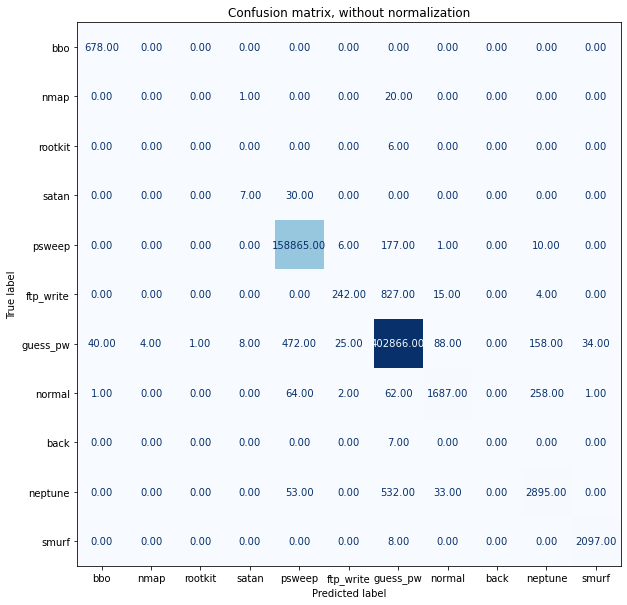

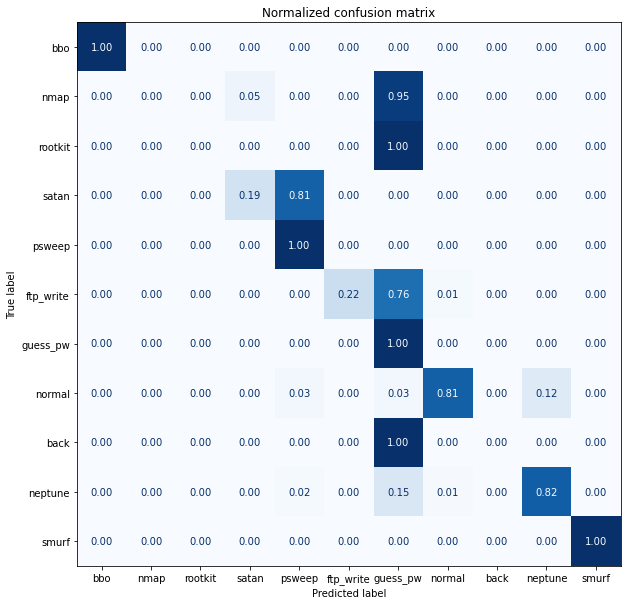

In [138]:
class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        log_model_multinom,
        X_train_multinom,
        y_train_multinom,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [153]:
# predict and get classification report on test data

y_pred = log_model_multinom.predict(X_test_multinom)
print(classification_report(y_test_multinom,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       290
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         2
           3       0.44      0.44      0.44        16
           4       1.00      1.00      1.00     68169
           5       0.90      0.23      0.36       466
           6       1.00      1.00      1.00    173014
           7       0.91      0.77      0.84       889
           8       0.00      0.00      0.00         3
           9       0.85      0.82      0.83      1506
          10       0.98      0.99      0.99       902

    accuracy                           0.99    245266
   macro avg       0.64      0.57      0.58    245266
weighted avg       0.99      0.99      0.99    245266



Confusion matrix, without normalization
[[   290      0      0      0      0      0     13      4      0      0
       0]
 [     0      0      0      0      0      0      2      0      0      0
       0]
 [     0      0      0      0      0      0      0      0      0      0
       0]
 [     0      0      0      7      0      0      9      0      0      0
       0]
 [     0      0      0      7  68085      0    175     34      0     19
       0]
 [     0      0      0      0      2    105     10      0      0      0
       0]
 [     0      9      2      2     79    351 172671     27      3    235
       6]
 [     0      0      0      0      1      8     38    686      0     20
       0]
 [     0      0      0      0      0      0      0      0      0      0
       0]
 [     0      0      0      0      2      2     80    137      0   1232
       0]
 [     0      0      0      0      0      0     16      1      0      0
     896]]
Normalized confusion matrix
[[9.44625407e-01 0.00000000e+

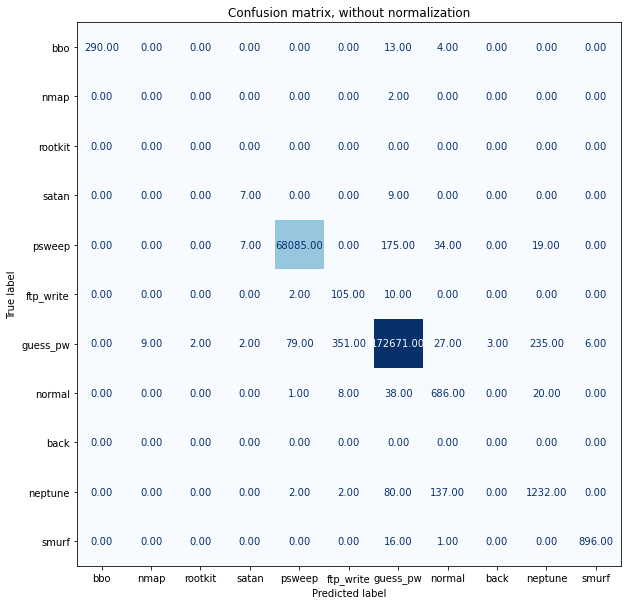

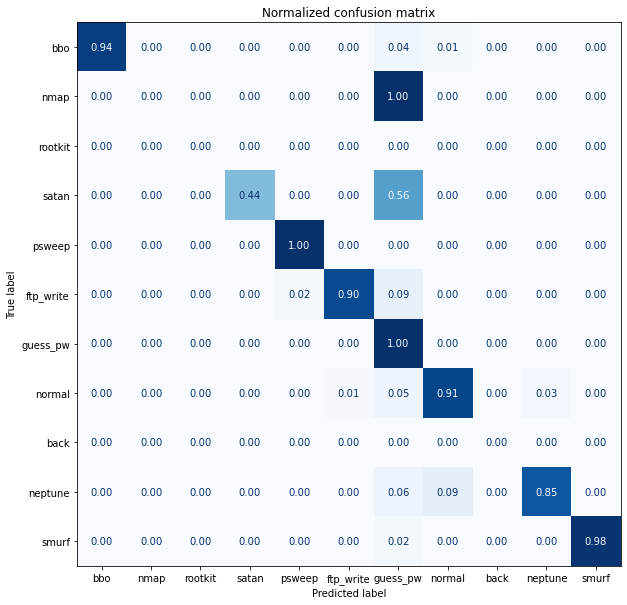

In [154]:
class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_pred,
        y_test_multinom,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Modelling with balancing class weights

In [125]:

log_model_multinom_bal = LogisticRegression(C = 1.0, 
                                        class_weight = 'balanced',   
                                        max_iter = 100,
                                        multi_class = 'ovr', 
                                        n_jobs = -1, 
                                        penalty = 'l2',
                                        random_state = 123, 
                                        solver = 'liblinear').fit(X_train_multinom,y_train_multinom)


In [126]:
# predict and get classification report on train data

y_train_multinom_pred_bal = log_model_multinom_bal.predict(X_train_multinom)
print(classification_report(y_train_multinom, y_train_multinom_pred_bal))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       678
           1       0.13      0.43      0.20        21
           2       0.01      0.17      0.01         6
           3       0.55      1.00      0.71        37
           4       1.00      1.00      1.00    159059
           5       0.41      0.66      0.50      1088
           6       1.00      0.99      1.00    403696
           7       0.62      0.74      0.67      2075
           8       0.00      0.29      0.01         7
           9       0.73      0.94      0.83      3513
          10       0.93      0.99      0.96      2105

    accuracy                           0.99    572285
   macro avg       0.58      0.75      0.62    572285
weighted avg       0.99      0.99      0.99    572285



Confusion matrix, without normalization
[[   678      0      0      0      0      0      0      0      0      0
       0]
 [     0      9      0      0      0      0      5      0      7      0
       0]
 [     0      0      1      0      0      0      3      0      2      0
       0]
 [     0      0      0     37      0      0      0      0      0      0
       0]
 [     0      4      0      0 158716      7    182    126      1     23
       0]
 [     0      0      0      0      0    720    162    202      0      4
       0]
 [    22     57    135     30    415   1007 400190    579    442    661
     158]
 [     0      0      0      0     15      8      7   1527      0    517
       1]
 [     0      0      0      0      0      0      5      0      2      0
       0]
 [     0      0     16      0     21     14    104     33      0   3316
       9]
 [     0      0      0      0      0     17      0      0      0      0
    2088]]
Normalized confusion matrix
[[1.00000000e+00 0.00000000e+

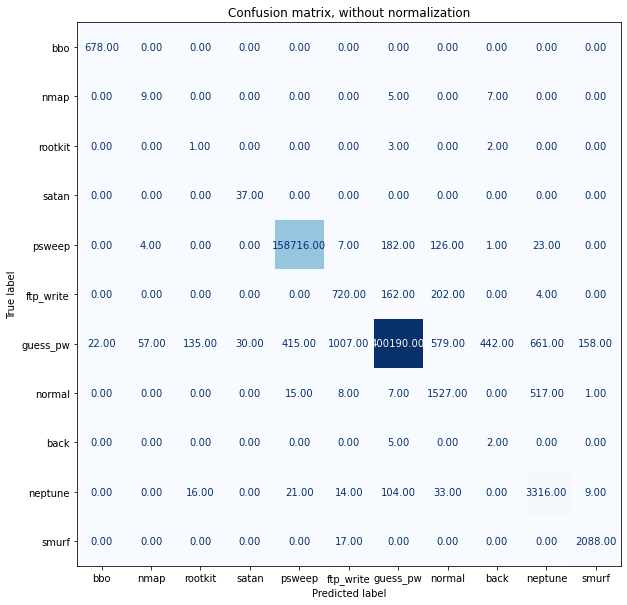

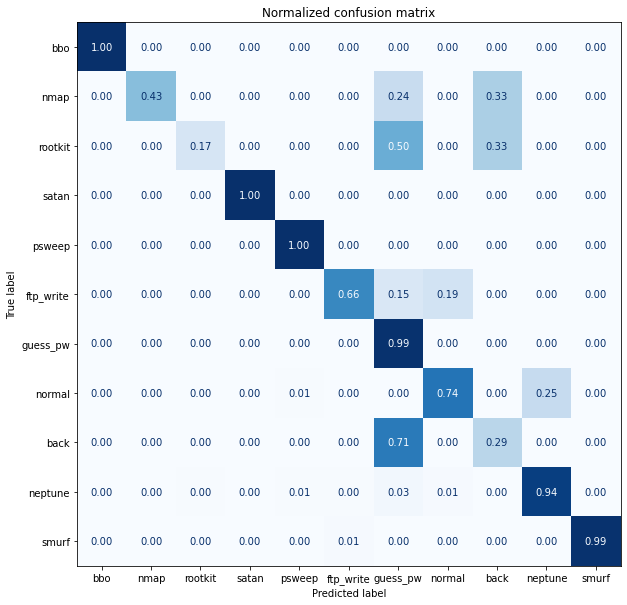

In [137]:
class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        log_model_multinom_bal,
        X_train_multinom,
        y_train_multinom,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [155]:
# predict and get classification report on test data

y_pred = log_model_multinom_bal.predict(X_test_multinom)
print(classification_report(y_test_multinom,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       290
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00         2
           3       0.50      0.88      0.64        16
           4       1.00      1.00      1.00     68169
           5       0.42      0.67      0.51       466
           6       1.00      0.99      1.00    173014
           7       0.60      0.72      0.66       889
           8       0.00      0.00      0.00         3
           9       0.72      0.94      0.81      1506
          10       0.93      0.99      0.96       902

    accuracy                           0.99    245266
   macro avg       0.56      0.65      0.60    245266
weighted avg       0.99      0.99      0.99    245266



Confusion matrix, without normalization
[[   290      0      0      0      0      0      8      1      0      0
       0]
 [     0      0      0      0      2      0     28      0      0      0
       0]
 [     0      1      0      0      0      0     54      0      0      2
       0]
 [     0      0      0     14      0      0     14      0      0      0
       0]
 [     0      0      0      0  68007      0    159      7      0      5
       0]
 [     0      0      0      0      5    312    415      2      0      5
       8]
 [     0      6      1      1     84     58 171547      3      3     54
       1]
 [     0      0      0      0     65     94    241    640      0     19
       0]
 [     0      2      0      1      1      0    175      0      0      0
       0]
 [     0      0      1      0      5      2    310    235      0   1414
       0]
 [     0      0      0      0      0      0     63      1      0      7
     893]]
Normalized confusion matrix
[[9.69899666e-01 0.00000000e+

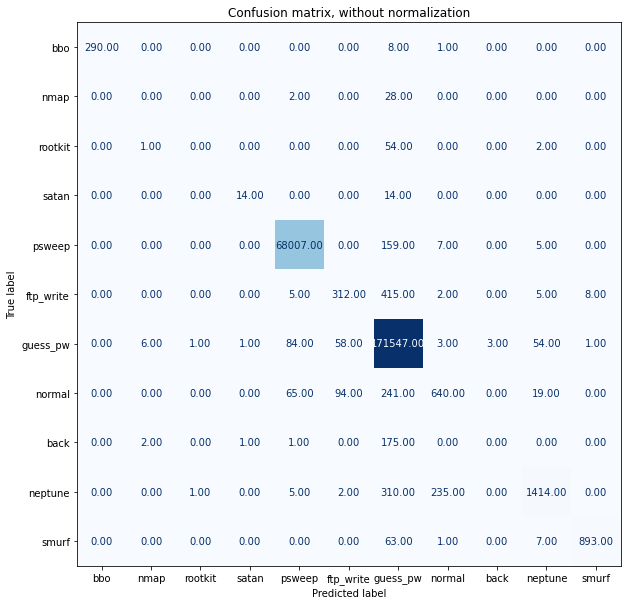

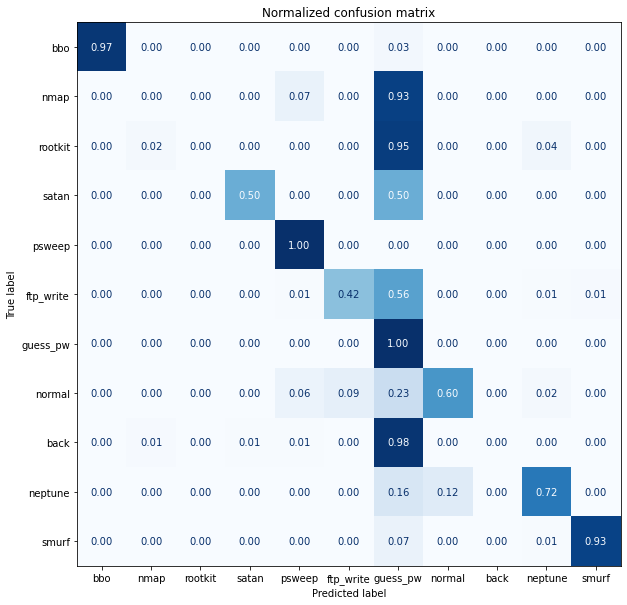

In [156]:
class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_pred,
        y_test_multinom,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

## Manual balancing of class weights

In [ ]:
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gscv_logreg_man_bal = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(x_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gscv_logreg_man_bal.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [ ]:
# predict and get classification report on train data

y_train_multinom_pred_man_bal = gscv_logreg_man_bal.predict(X_train_multinom)
print(classification_report(y_train_multinom, y_train_multinom_pred_bal))

class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        gscv_logreg_man_bal,
        X_train_multinom,
        y_train_multinom,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# predict and get classification report on test data

y_pred = gscv_logreg_man_bal.predict(X_test_multinom)
print(classification_report(y_test_multinom,y_pred))


class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_pred,
        y_test_multinom,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

# Modelling with balancing class weights and changing the multi-class option to multinomial

In [145]:

log_model_multinom_bal_mn = LogisticRegression(C = 1.0, 
                                        class_weight = 'balanced',   
                                        max_iter = 1000,
                                        multi_class = 'multinomial', 
                                        n_jobs = -1, 
                                        penalty = 'l2',
                                        random_state = 123, 
                                        solver = 'lbfgs').fit(X_train_multinom,y_train_multinom)


/Users/shamshersingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [159]:
# predict and get classification report on train data

y_train_multinom_pred_bal_mn = log_model_multinom_bal_mn.predict(X_train_multinom)
print(classification_report(y_train_multinom, y_train_multinom_pred_bal_mn))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       678
           1       0.07      0.95      0.13        21
           2       0.01      1.00      0.02         6
           3       0.62      1.00      0.76        37
           4       1.00      1.00      1.00    159059
           5       0.18      0.97      0.30      1088
           6       1.00      0.97      0.98    403696
           7       0.51      0.94      0.66      2075
           8       0.00      1.00      0.01         7
           9       0.55      0.96      0.70      3513
          10       1.00      1.00      1.00      2105

    accuracy                           0.98    572285
   macro avg       0.54      0.98      0.60    572285
weighted avg       0.99      0.98      0.98    572285



Confusion matrix, without normalization
[[   678      0      0      0      0      0      0      0      0      0
       0]
 [     0     20      1      0      0      0      0      0      0      0
       0]
 [     0      0      6      0      0      0      0      0      0      0
       0]
 [     0      0      0     37      0      0      0      0      0      0
       0]
 [     0      4      0      0 158771     75     15    173      0     21
       0]
 [     0      0      0      0      0   1051     25      9      0      3
       0]
 [    10    263    750     23    482   4630 390558   1601   2711   2659
       9]
 [     0      0      0      0      6     12      3   1954      0    100
       0]
 [     0      0      0      0      0      0      0      0      7      0
       0]
 [     0      0      6      0      1     41      7     79     10   3369
       0]
 [     0      0      0      0      0      0      0      0      0      0
    2105]]
Normalized confusion matrix
[[1.00000000e+00 0.00000000e+

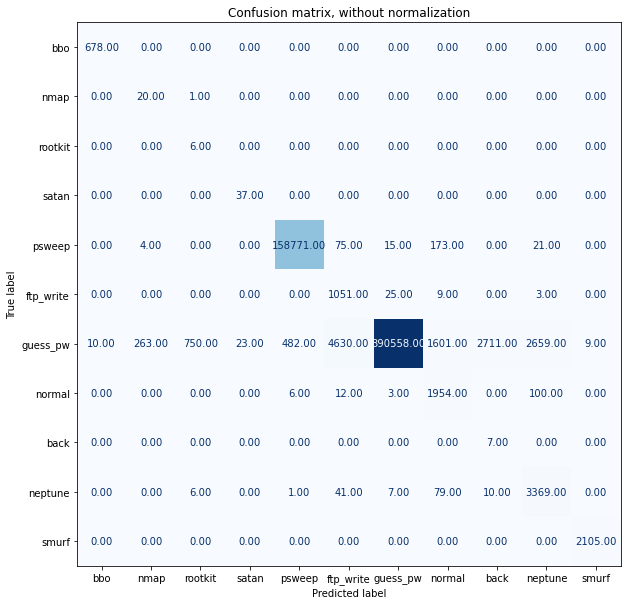

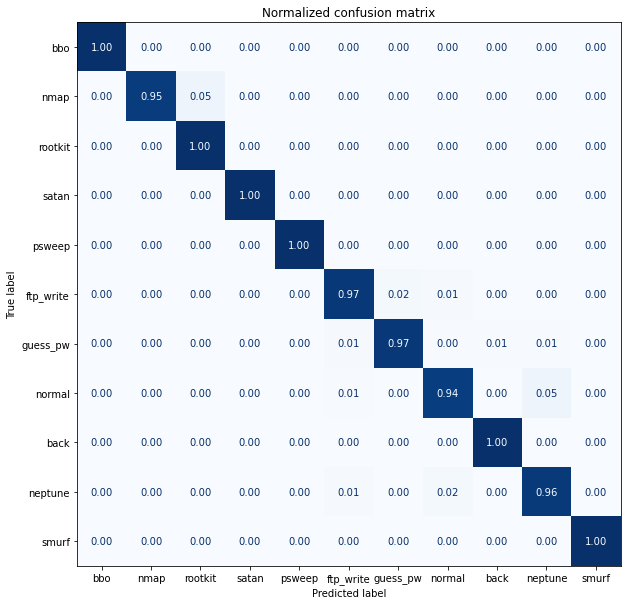

In [160]:
class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        log_model_multinom_bal_mn,
        X_train_multinom,
        y_train_multinom,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [161]:
# predict and get classification report on test data

y_pred = log_model_multinom_bal_mn.predict(X_test_multinom)
print(classification_report(y_test_multinom,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       290
           1       0.06      0.89      0.12         9
           2       0.00      0.00      0.00         2
           3       0.45      0.88      0.60        16
           4       1.00      1.00      1.00     68169
           5       0.18      0.96      0.31       466
           6       1.00      0.97      0.98    173014
           7       0.49      0.92      0.64       889
           8       0.00      1.00      0.01         3
           9       0.56      0.96      0.71      1506
          10       0.99      1.00      1.00       902

    accuracy                           0.98    245266
   macro avg       0.52      0.87      0.58    245266
weighted avg       0.99      0.98      0.98    245266



Confusion matrix, without normalization
[[   290      0      0      0      0      0      4      0      0      0
       0]
 [     0      8      1      1      4      0    113      0      0      0
       0]
 [     0      0      0      0      0      0    303      1      0      1
       0]
 [     0      0      0     14      0      0     16      1      0      0
       0]
 [     0      0      0      0  68026      0    197      5      0      0
       0]
 [     0      0      0      0     37    446   1942      6      0     14
       0]
 [     0      0      0      0      6     11 167555      2      0      4
       1]
 [     0      0      0      0     84      7    727    815      0     40
       0]
 [     0      1      0      1      0      0   1099      0      3      3
       0]
 [     0      0      1      0     12      2   1053     59      0   1444
       0]
 [     0      0      0      0      0      0      5      0      0      0
     901]]
Normalized confusion matrix
[[9.86394558e-01 0.00000000e+

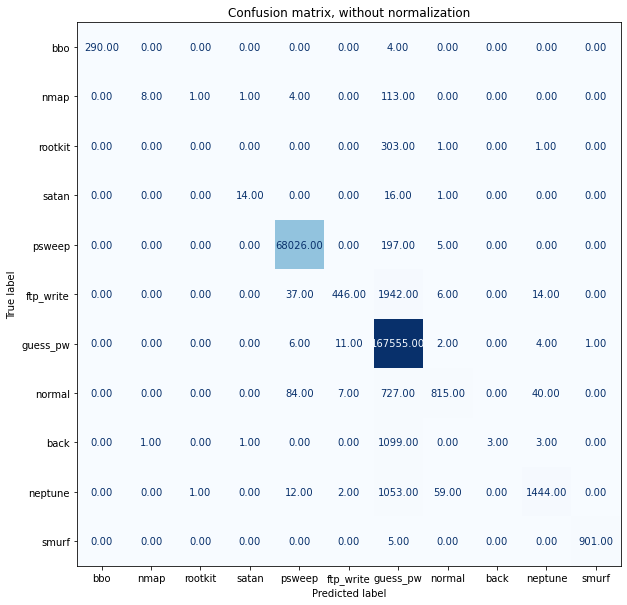

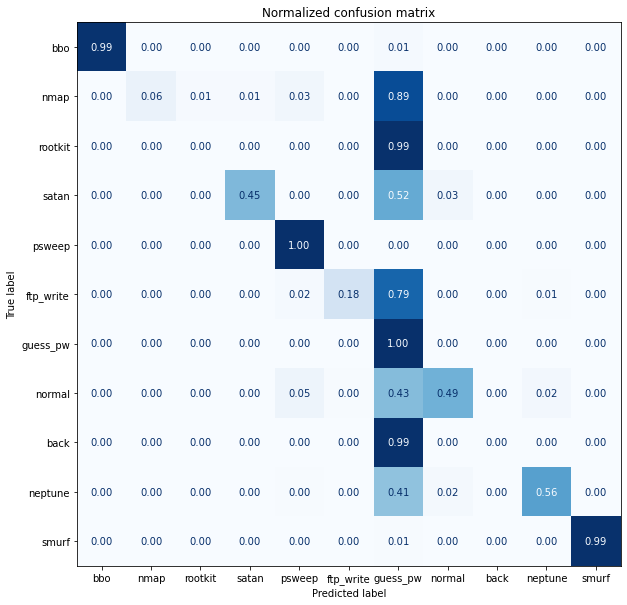

In [162]:
class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_pred,
        y_test_multinom,
        display_labels = class_names,
        cmap = plt.cm.Blues,
        normalize = normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# # modelling with GridSearch to find the optimum value of C

# params = {'C':[0.1,0.01,0.001,1.0]}

# lmm_grid = GridSearchCV(LogisticRegression(class_weight = 'balanced',   
#                                         max_iter = 100,
#                                         multi_class = 'ovr', 
#                                         n_jobs = -1, 
#                                         penalty = 'l2',
#                                         random_state = 123, 
#                                         solver = 'liblinear'), 
#                        param_grid = params,
#                        scoring = 'accuracy',
#                        cv = 10).fit(X_train_multinom,y_train_multinom)

# Decision Tree

In [212]:

dt = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=2023,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight='balanced',
    ccp_alpha=0.0).fit(X_train_multinom, y_train_multinom)


In [232]:
feature_imp = pd.DataFrame(zip(dt.feature_names_in_,dt.feature_importances_), columns = ['Variable', 'Feat_Imp'])
feature_imp.sort_values(by = 'Feat_Imp', ascending = False)

,Variable,Feat_Imp
4,src_bytes,0.306905
11,dst_host_serror_rate,0.199633
10,srv_count,0.150057
8,dst_bytes,0.113815
12,dst_host_same_src_port_rate,0.094084
...,...,...
9,service_0dt14,0.016814
1,protocol_type_0dt02,0.002883
3,flag_0dt05,0.000386
7,service_0dt01,0.000049


In [233]:
# get the best score and parameters
print('Best score: ', dt.score(X_train_multinom, y_train_multinom))
print('Best parameters: ', dt.tree_.max_depth )


Best score:  0.999984273569987
Best parameters:  26


585

In [184]:
y_train_multinom_pred_dt = dt.predict(X_train_multinom)
print(classification_report(y_train_multinom, y_train_multinom_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00    159059
           5       0.99      1.00      1.00      1088
           6       1.00      1.00      1.00    403696
           7       1.00      1.00      1.00      2075
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00      3513
          10       1.00      1.00      1.00      2105

    accuracy                           1.00    572285
   macro avg       1.00      1.00      1.00    572285
weighted avg       1.00      1.00      1.00    572285



Confusion matrix, without normalization
[[   678      0      0      0      0      0      0      0      0      0
       0]
 [     0     21      0      0      0      0      0      0      0      0
       0]
 [     0      0      6      0      0      0      0      0      0      0
       0]
 [     0      0      0     37      0      0      0      0      0      0
       0]
 [     0      0      0      0 159059      0      0      0      0      0
       0]
 [     0      0      0      0      0   1088      6      1      0      0
       0]
 [     0      0      0      0      0      0 403690      1      0      1
       0]
 [     0      0      0      0      0      0      0   2073      0      0
       0]
 [     0      0      0      0      0      0      0      0      7      0
       0]
 [     0      0      0      0      0      0      0      0      0   3512
       0]
 [     0      0      0      0      0      0      0      0      0      0
    2105]]
Normalized confusion matrix
[[1.00000000e+00 0.00000000e+

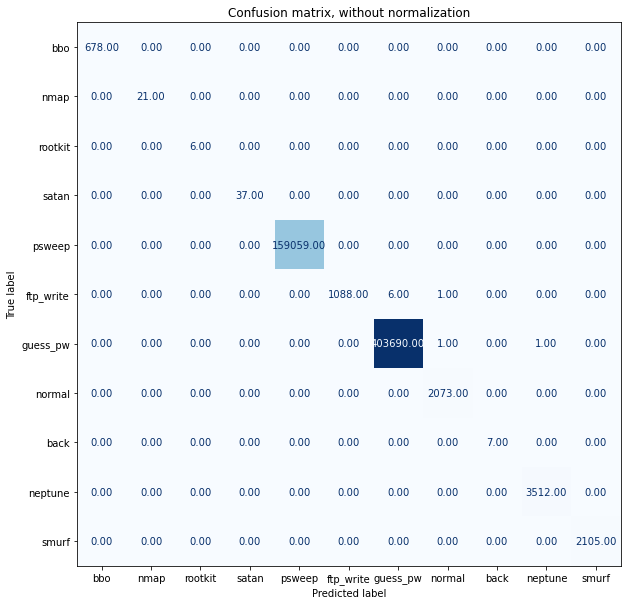

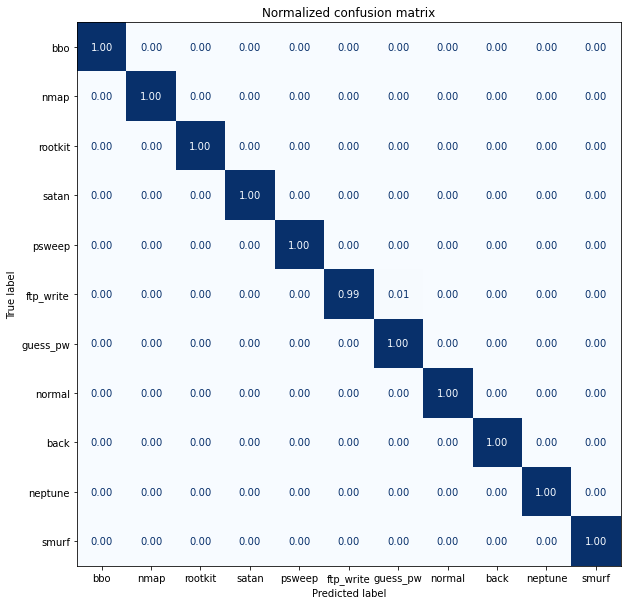

In [185]:

class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_train_multinom_pred_dt,
        y_train_multinom,
        display_labels = class_names,
        cmap = plt.cm.Blues,
        normalize = normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Testing Decision Tree on Testing Data

In [187]:
y_test_multinom_pred_dt = dt.predict(X_test_multinom)
print(classification_report(y_test_multinom, y_test_multinom_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       0.89      0.89      0.89         9
           2       0.00      0.00      0.00         2
           3       1.00      0.88      0.93        16
           4       1.00      1.00      1.00     68169
           5       1.00      1.00      1.00       466
           6       1.00      1.00      1.00    173014
           7       0.99      0.99      0.99       889
           8       0.00      0.00      0.00         3
           9       1.00      0.99      1.00      1506
          10       1.00      1.00      1.00       902

    accuracy                           1.00    245266
   macro avg       0.81      0.79      0.80    245266
weighted avg       1.00      1.00      1.00    245266



Confusion matrix, without normalization
[[   290      0      0      0      0      0      1      0      0      0
       0]
 [     0      8      0      0      0      0      1      0      0      0
       0]
 [     0      0      0      0      0      0      1      0      0      0
       0]
 [     0      0      0     14      0      0      0      0      0      0
       0]
 [     0      0      0      0  68168      0      1      1      0      0
       0]
 [     0      0      0      0      0    464      1      0      0      0
       0]
 [     0      1      2      2      0      0 172998      9      3      8
       1]
 [     0      0      0      0      0      2      6    879      0      0
       0]
 [     0      0      0      0      0      0      1      0      0      0
       0]
 [     0      0      0      0      1      0      4      0      0   1498
       0]
 [     0      0      0      0      0      0      0      0      0      0
     901]]
Normalized confusion matrix
[[9.96563574e-01 0.00000000e+

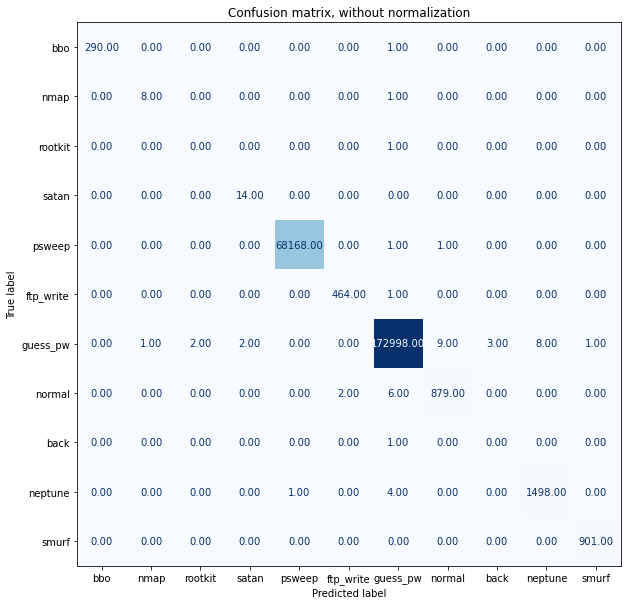

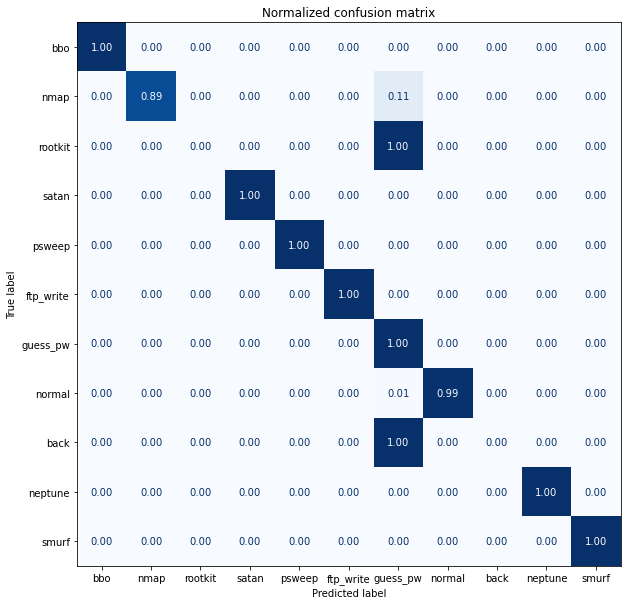

In [252]:
plt.rcParams['figure.figsize'] = (10,10)

class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test_multinom_pred_dt,
        y_test_multinom,
        display_labels = class_names,
        cmap = plt.cm.Blues,
        normalize = normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Using GridSearchCV with Decision Trees

In [272]:

param_grid = { 'max_depth': range(4, 8),
                 'min_samples_leaf': range(1, 4), 
                     'min_samples_split': range(2, 5, 1) }


dt_gcv = GridSearchCV(DecisionTreeClassifier(random_state = 0, class_weight = 'balanced'), 
                      param_grid,
                      cv = 10, 
                      n_jobs = -1,
                      scoring = 'accuracy', 
                      verbose = False).fit(X_train_multinom, y_train_multinom)

print(dt_gcv.best_estimator_)
print(dt_gcv.best_params_)
print(dt_gcv.best_score_)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=0)
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8774718187243613


In [273]:
y_train_multinom_pred_dt_gcv = dt_gcv.best_estimator_.predict(X_train_multinom)
print(classification_report(y_train_multinom, y_train_multinom_pred_dt_gcv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       0.00      0.90      0.00        21
           2       0.00      1.00      0.00         6
           3       1.00      1.00      1.00        37
           4       0.99      1.00      1.00    159059
           5       0.11      0.84      0.20      1088
           6       1.00      0.84      0.91    403696
           7       0.18      0.85      0.30      2075
           8       0.00      0.57      0.01         7
           9       0.88      0.98      0.93      3513
          10       0.21      1.00      0.34      2105

    accuracy                           0.88    572285
   macro avg       0.49      0.91      0.52    572285
weighted avg       0.99      0.88      0.93    572285



<Figure size 720x720 with 0 Axes>

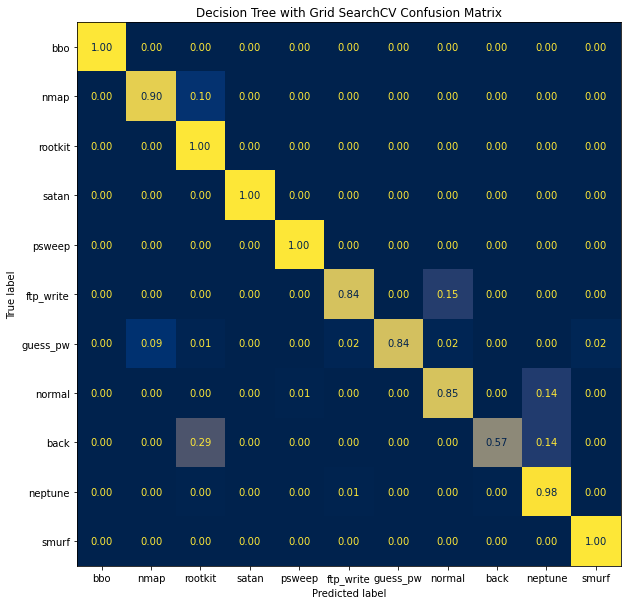

In [274]:
class_names = data.Attack_Type.unique()
plt.figure(figsize = (10,10))

plt.rcParams['figure.figsize'] = (10,10)

ConfusionMatrixDisplay.from_predictions(y_train_multinom, 
                                       y_train_multinom_pred_dt_gcv,
                                       display_labels = class_names, 
                                       values_format = '.2f',
                                       cmap = plt.cm.cividis,
                                       colorbar = False, 
                                       normalize = 'true')

plt.title('Decision Tree with Grid SearchCV Confusion Matrix')
plt.show()

<Figure size 720x720 with 0 Axes>

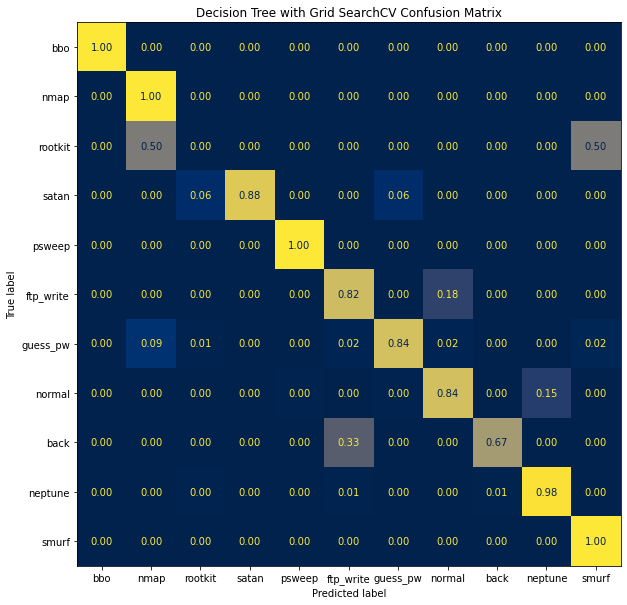

In [275]:
y_test_multinom_pred_dt_gcv = dt_gcv.best_estimator_.predict(X_test_multinom)

class_names = data.Attack_Type.unique()
plt.figure(figsize = (10,10))

plt.rcParams['figure.figsize'] = (10,10)

ConfusionMatrixDisplay.from_predictions(y_test_multinom, 
                                       y_test_multinom_pred_dt_gcv,
                                       display_labels = class_names, 
                                       values_format = '.2f',
                                       cmap = plt.cm.cividis,
                                       colorbar = False, 
                                       normalize = 'true')

plt.title('Decision Tree with Grid SearchCV Confusion Matrix')
plt.show()


# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 500, class_weight = 'balanced', oob_score = True).fit(X_train_multinom,y_train_multinom)

param_grid = {'max_depth' : range(3, 6),
                 'min_samples_split' : range(2, 5, 1),
                     'min_samples_leaf' : range(1, 4),
                         'n_estimators' : [50, 100, 150, 200, 250, 300]}

rf_gcv = GridSearchCV(rf,
                     param_grid = param_grid,
                     cv = 10, 
                     n_jobs = -1, 
                     scoring = 'accuracy',
                     verbose = False).fit(X_train_multinom, y_train_multinom)

In [257]:
y_train_multinom_pred_rf_gcv = rf_gcv.predict(X_train_multinom)
print(classification_report(y_train_multinom, y_train_multinom_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       678
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00    159059
           5       0.99      1.00      1.00      1088
           6       1.00      1.00      1.00    403696
           7       1.00      1.00      1.00      2075
           8       1.00      1.00      1.00         7
           9       1.00      1.00      1.00      3513
          10       1.00      1.00      1.00      2105

    accuracy                           1.00    572285
   macro avg       1.00      1.00      1.00    572285
weighted avg       1.00      1.00      1.00    572285



<Figure size 720x720 with 0 Axes>

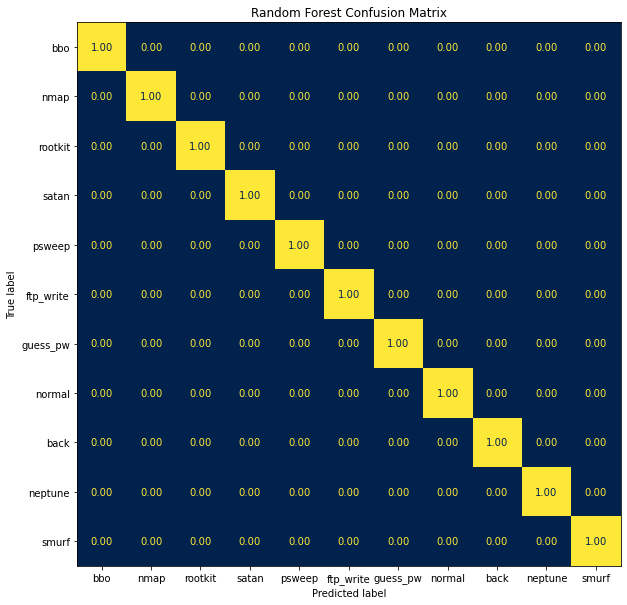

In [261]:
class_names = data.Attack_Type.unique()
plt.figure(figsize = (10,10))

plt.rcParams['figure.figsize'] = (10,10)

ConfusionMatrixDisplay.from_predictions(y_train_multinom, 
                                       y_train_multinom_pred_rf_gcv,
                                       display_labels = class_names, 
                                       values_format = '.2f',
                                       cmap = plt.cm.cividis,
                                       colorbar = False, 
                                       normalize = 'true')

plt.title('Random Forest Confusion Matrix')
plt.show()

In [280]:
y_test_multinom_pred_rf = rf_gcv.predict(X_test_multinom)
print(classification_report(y_test_multinom, y_test_multinom_pred_rf_gcv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      0.78      0.88         9
           2       0.00      0.00      0.00         2
           3       1.00      0.88      0.93        16
           4       1.00      1.00      1.00     68169
           5       1.00      1.00      1.00       466
           6       1.00      1.00      1.00    173014
           7       1.00      0.99      0.99       889
           8       0.00      0.00      0.00         3
           9       1.00      0.99      1.00      1506
          10       1.00      1.00      1.00       902

    accuracy                           1.00    245266
   macro avg       0.82      0.79      0.80    245266
weighted avg       1.00      1.00      1.00    245266



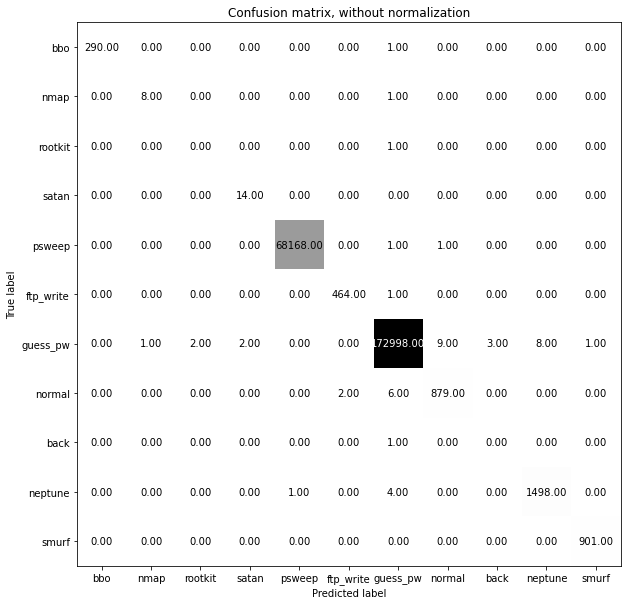

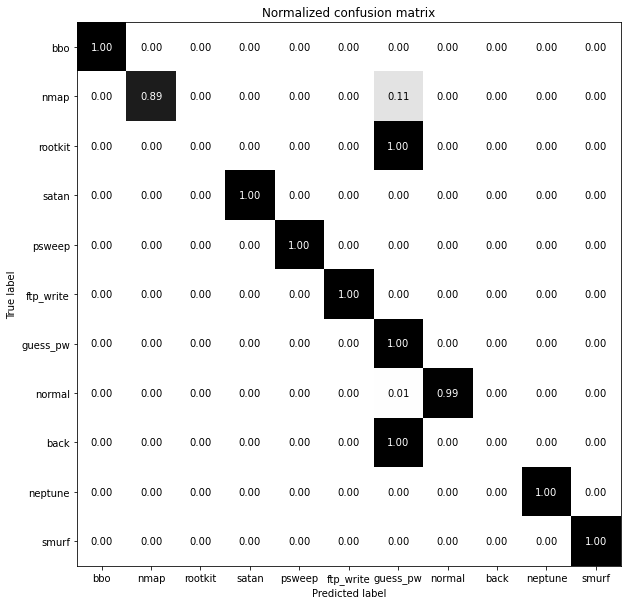

In [269]:
plt.rcParams['figure.figsize'] = (10,10)

class_names = data.Attack_Type.unique()

# Plot non-normalized and normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", "true"),]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_predictions(
        y_test_multinom_pred_rf_gcv,
        y_test_multinom,
        display_labels = class_names,
        cmap = plt.cm.binary,
        normalize = normalize,
        values_format = '.2f',
        colorbar = False
    )
    disp.ax_.set_title(title)

plt.show()

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,6.0,10.0,7.135,24527.0,155803.0,0.0,134197.2,156183,635.231,24527.0,155803.0,156183,0.0,10.0,11.610,11.638,0.0,11.610,1.161
1,2,6.0,6.0,6.000,24527.0,147169.0,0.0,134197.2,147162,600.029,49054.0,302972.0,303345,0.0,20.0,22.577,22.604,0.0,22.577,1.129
2,3,6.0,6.0,6.000,24526.0,147156.0,0.0,134197.2,147156,600.000,73580.0,450128.0,450501,0.0,30.0,33.542,33.570,0.0,33.542,1.118
3,4,6.0,6.0,6.000,24527.0,147163.0,0.0,134197.2,147162,600.004,98107.0,597291.0,597663,0.0,40.0,44.508,44.536,0.0,44.508,1.113
4,5,6.0,6.0,6.000,24526.0,147157.0,0.0,134197.2,147156,600.004,122633.0,744448.0,744819,0.0,50.0,55.474,55.502,0.0,55.474,1.109
5,6,6.0,6.0,6.000,24527.0,147162.0,0.0,134197.2,147162,600.000,147160.0,891610.0,891981,0.0,60.0,66.440,66.468,0.0,66.440,1.107
6,7,4.0,6.0,4.836,24527.0,121941.0,0.0,134197.2,147162,497.170,171687.0,1013551.0,1039143,0.0,70.0,75.527,77.434,0.0,75.527,1.079
7,8,4.0,4.0,4.000,24526.0,98372.0,0.0,134197.2,107824,401.093,196213.0,1111923.0,1146967,0.0,80.0,82.857,85.469,0.0,82.857,1.036
8,9,4.0,4.0,4.000,24527.0,98387.0,0.0,134197.2,98108,401.138,220740.0,1210310.0,1245075,0.0,90.0,90.189,92.780,0.0,90.189,1.002
9,10,0.0,4.0,1.915,24526.0,131662.0,290.0,134197.2,96897,536.826,245266.0,1341972.0,1341972,290.0,100.0,100.000,100.000,100.0,0.000,1.000


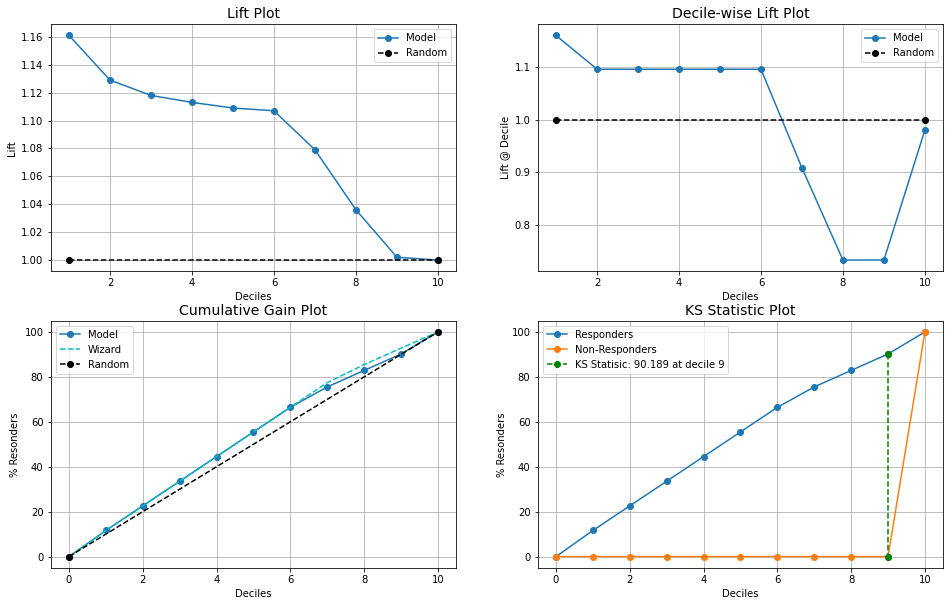

In [278]:
kds.metrics.report(y_test_multinom,y_test_multinom_pred_dt_gcv)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,6.0,10.0,6.366,24527.0,156136.0,0.0,134197.2,156183,636.588,24527.0,156136.0,156183,0.0,10.0,11.635,11.638,0.0,11.635,1.164
1,2,6.0,6.0,6.000,24527.0,147172.0,0.0,134197.2,147162,600.041,49054.0,303308.0,303345,0.0,20.0,22.602,22.604,0.0,22.602,1.130
2,3,6.0,6.0,6.000,24526.0,147164.0,0.0,134197.2,147156,600.033,73580.0,450472.0,450501,0.0,30.0,33.568,33.570,0.0,33.568,1.119
3,4,6.0,6.0,6.000,24527.0,147166.0,0.0,134197.2,147162,600.016,98107.0,597638.0,597663,0.0,40.0,44.534,44.536,0.0,44.534,1.113
4,5,6.0,6.0,6.000,24526.0,147160.0,0.0,134197.2,147156,600.016,122633.0,744798.0,744819,0.0,50.0,55.500,55.502,0.0,55.500,1.110
5,6,6.0,6.0,6.000,24527.0,147165.0,0.0,134197.2,147162,600.012,147160.0,891963.0,891981,0.0,60.0,66.467,66.468,0.0,66.467,1.108
6,7,6.0,6.0,6.000,24527.0,147155.0,0.0,134197.2,147162,599.971,171687.0,1039118.0,1039143,0.0,70.0,77.432,77.434,0.0,77.432,1.106
7,8,4.0,6.0,4.397,24526.0,107835.0,0.0,134197.2,107824,439.676,196213.0,1146953.0,1146967,0.0,80.0,85.468,85.469,0.0,85.468,1.068
8,9,4.0,4.0,4.000,24527.0,98110.0,0.0,134197.2,98108,400.008,220740.0,1245063.0,1245075,0.0,90.0,92.779,92.780,0.0,92.779,1.031
9,10,0.0,4.0,3.951,24526.0,96909.0,290.0,134197.2,96897,395.128,245266.0,1341972.0,1341972,290.0,100.0,100.000,100.000,100.0,0.000,1.000


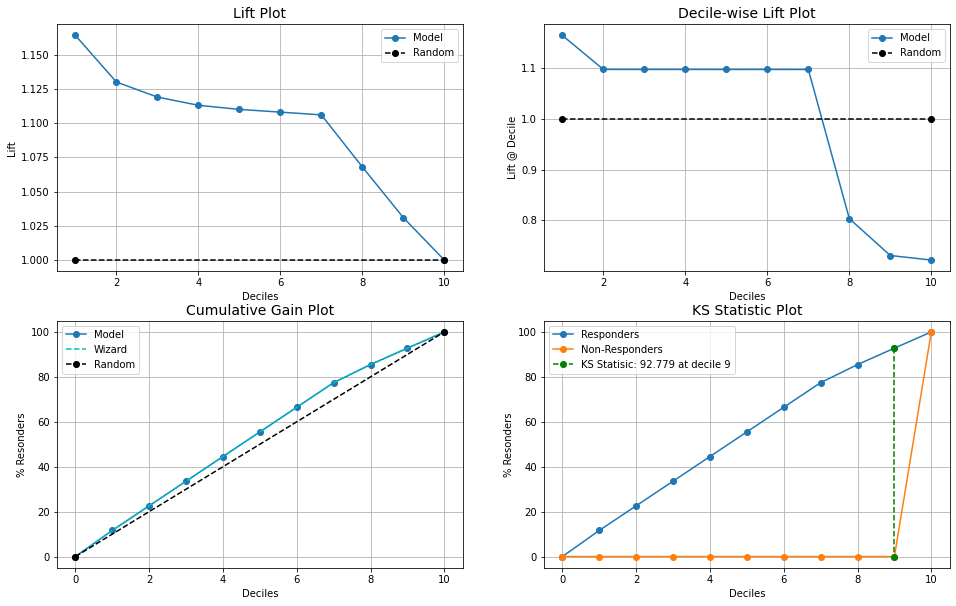

In [281]:
kds.metrics.report(y_test_multinom,y_test_multinom_pred_rf_gcv)

In [ ]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(rf_gcv)

# FINISH